In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import os
import glob

In [10]:
# List of 50 stock symbols
stocks = [
    "AAPL","MSFT","GOOGL","AMZN","TSLA","META","NVDA","JPM","V","UNH",
    "HD","PG","DIS","MA","BAC","NFLX","ADBE","PYPL","CMCSA","XOM",
    "PFE","KO","INTC","CSCO","NKE","MRK","PEP","ABBV","ABT","CRM",
    "ORCL","T","VZ","CVX","MCD","WMT","DHR","ACN","LLY","AVGO",
    "QCOM","TXN","NEE","COST","TMUS","IBM","SBUX","MDT","HON","AMD"
]

# Folders
processed_folder = "../data/processed"
predictions_folder = "../data/predictions/RIDGE_predictions"
predictions_folder_recursive = "../data/predictions/RIDGE_recursive"
plots_folder = "../plots/RIDGE_plots"
plots_folder_recursive = "../data/plots/RIDGE_recursive"
os.makedirs(predictions_folder, exist_ok=True)
os.makedirs(predictions_folder_recursive, exist_ok=True)
os.makedirs(plots_folder, exist_ok=True)

processed_stocks = []
skipped_stocks = []

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing AAPL ---


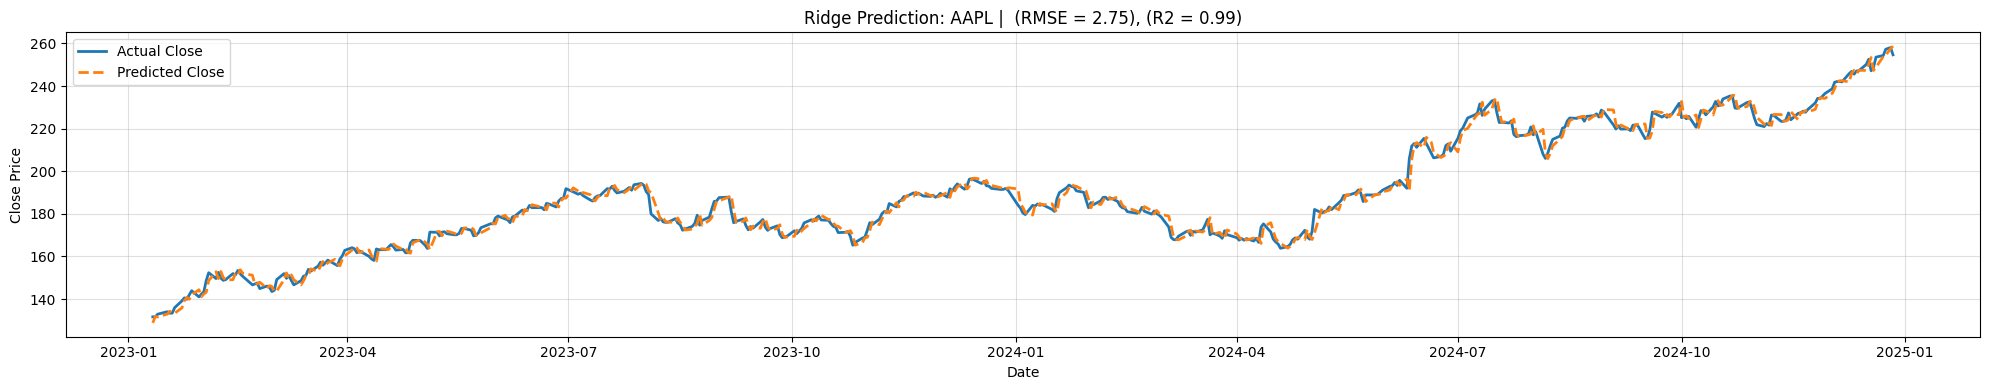

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing MSFT ---


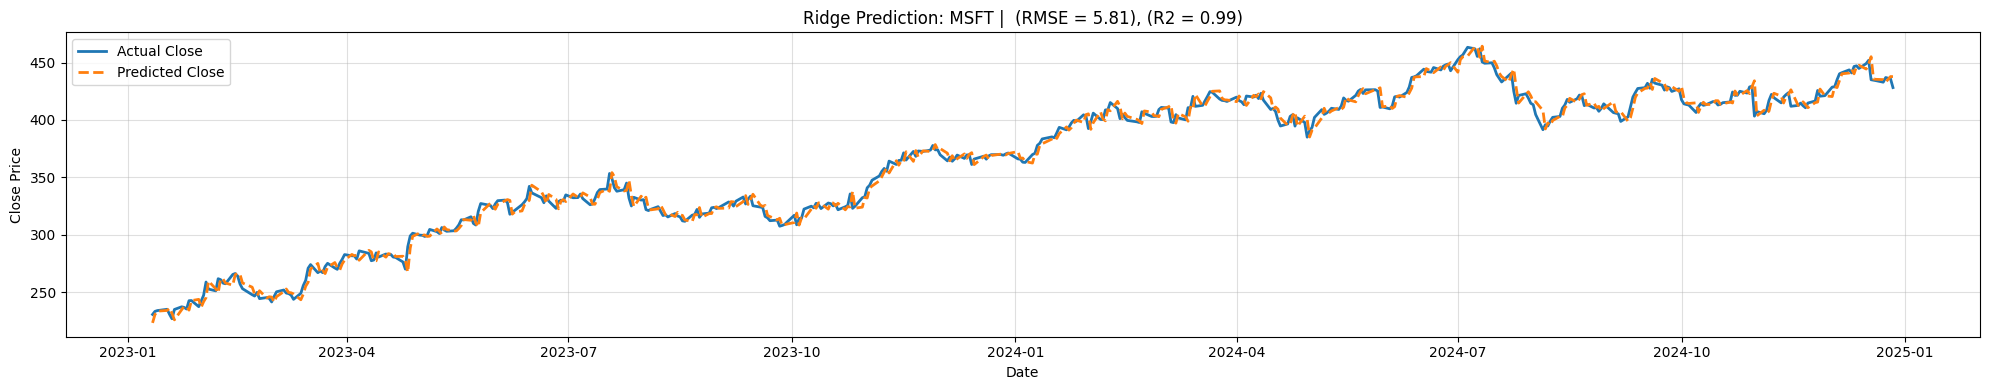

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing GOOGL ---


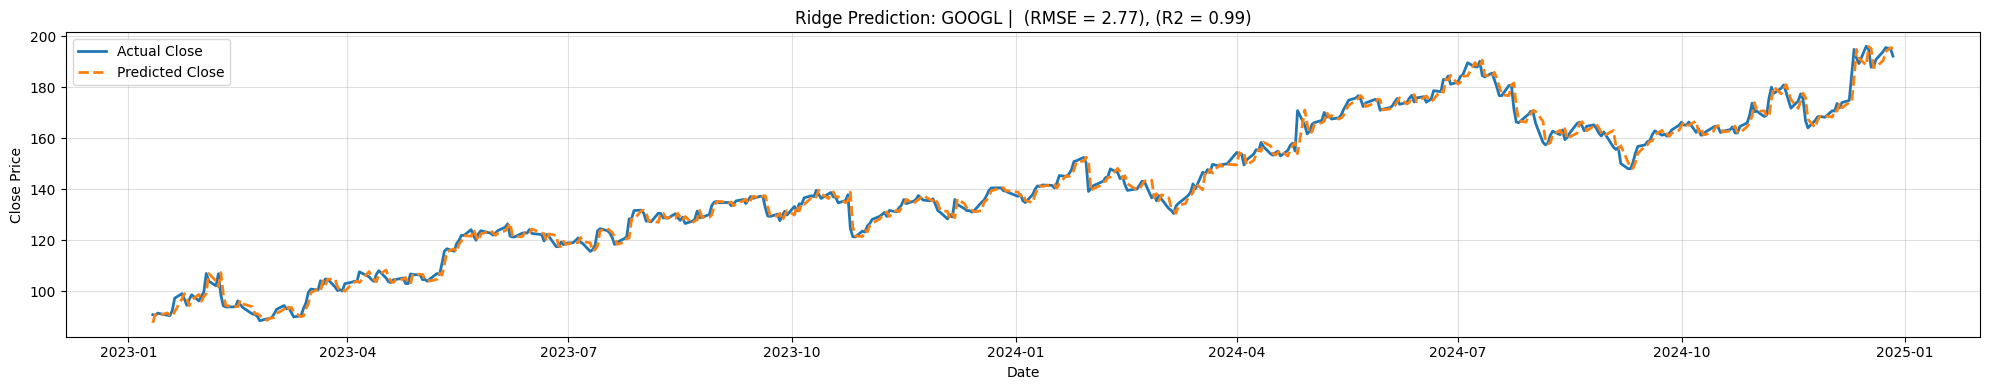

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing AMZN ---


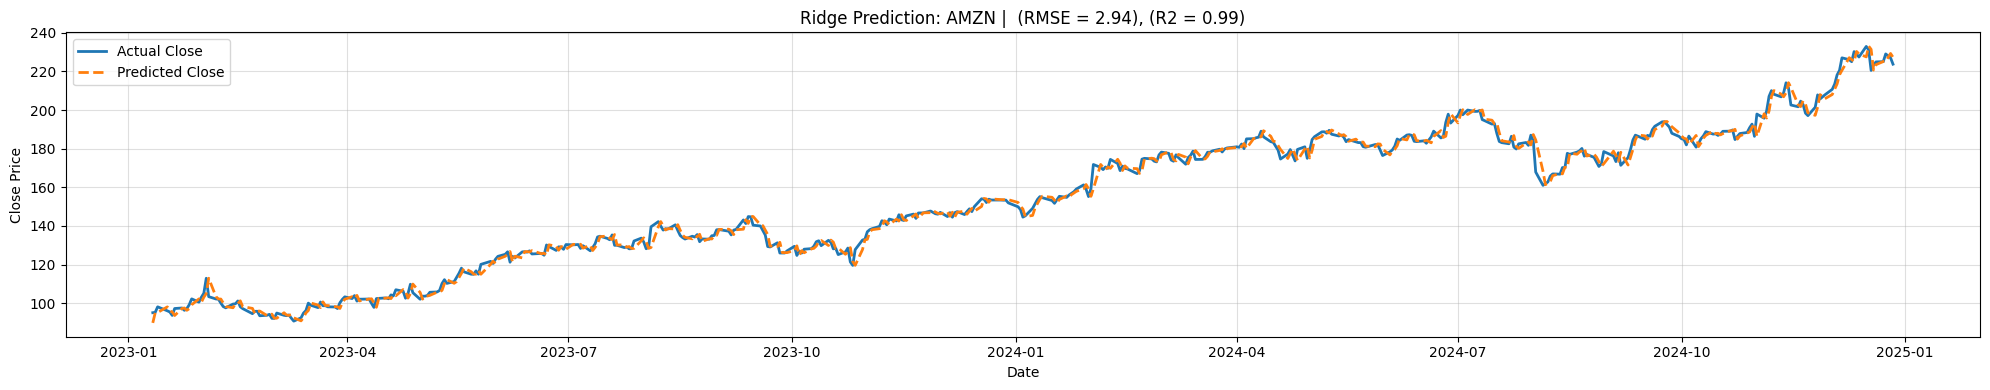

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing TSLA ---


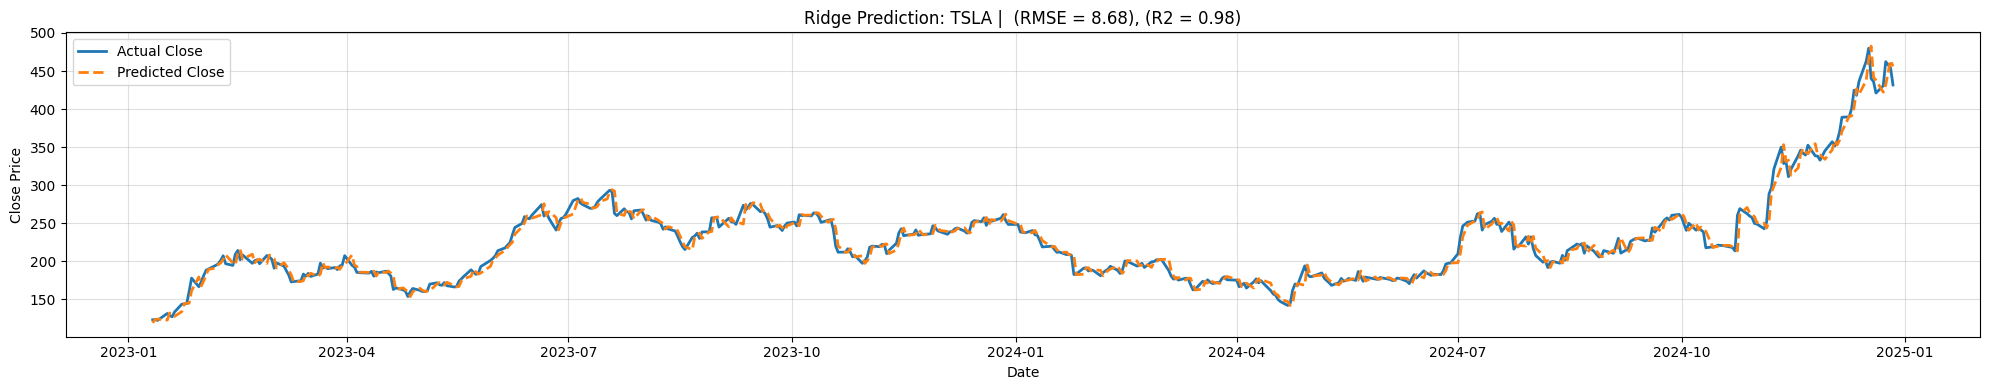

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing META ---


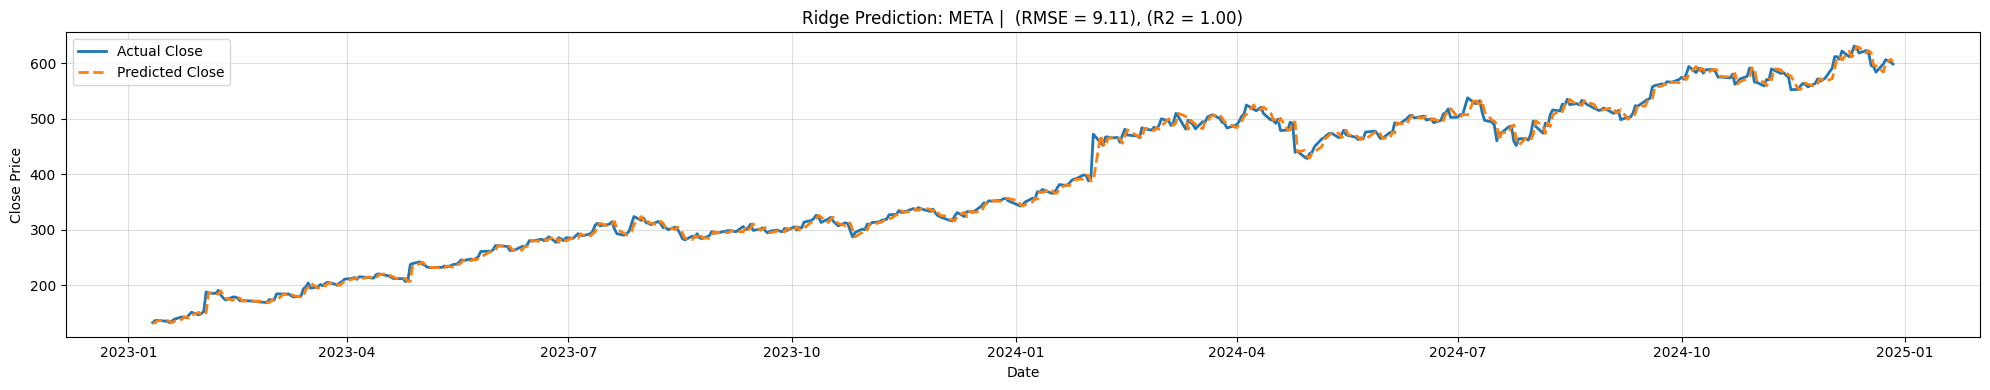

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing NVDA ---


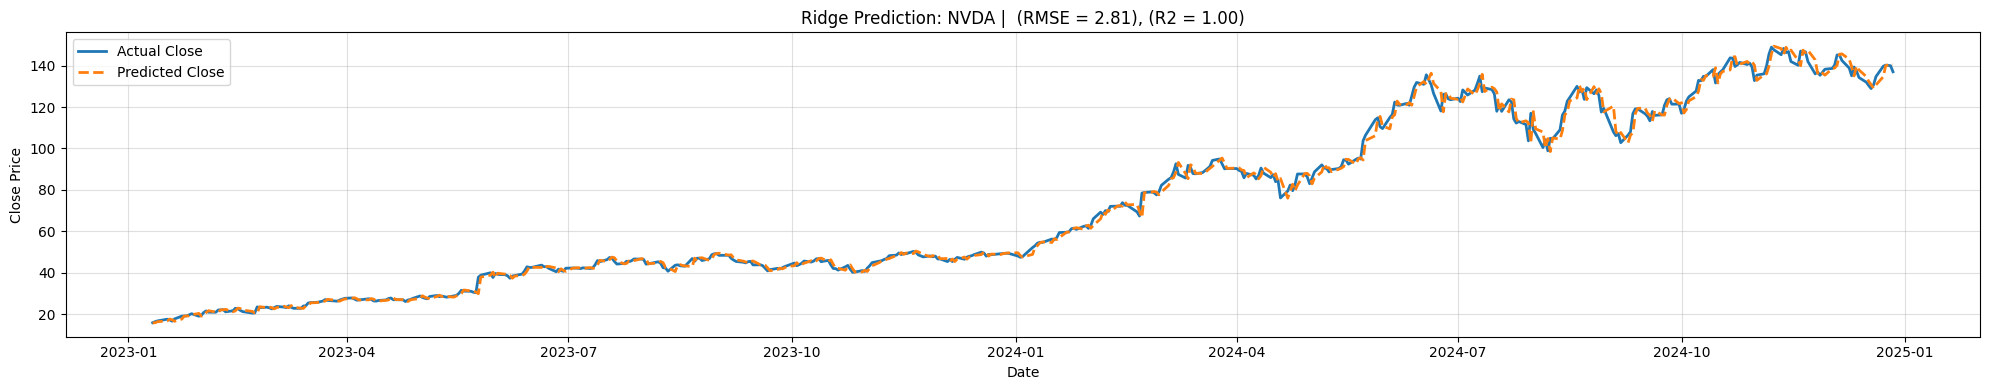

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing JPM ---


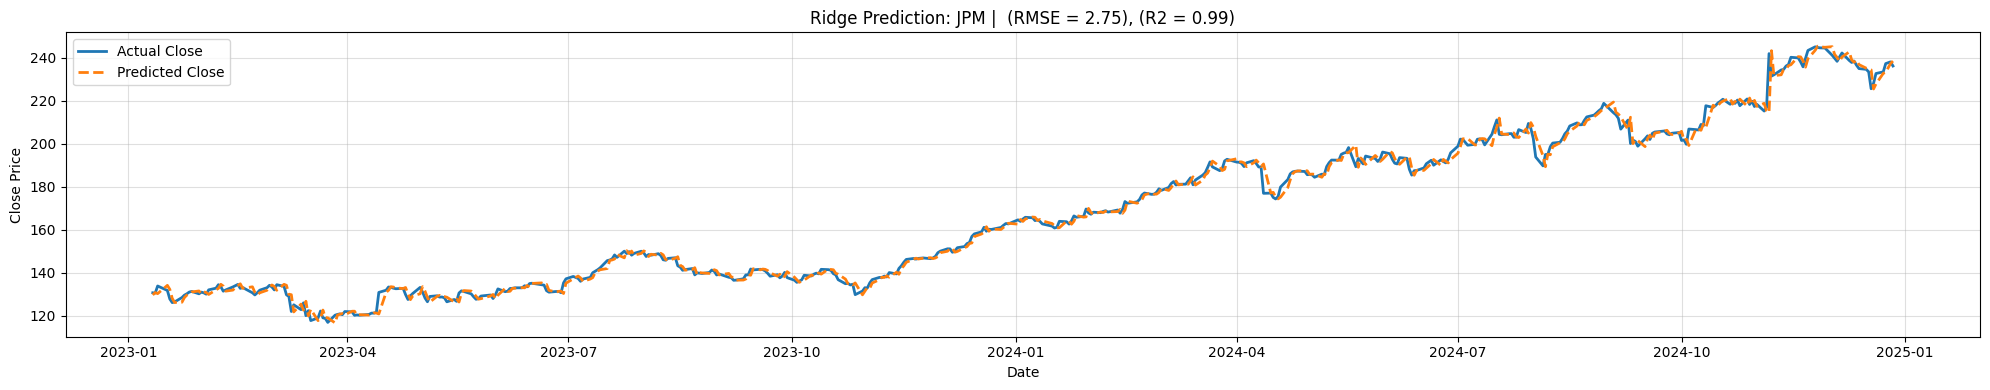

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing V ---


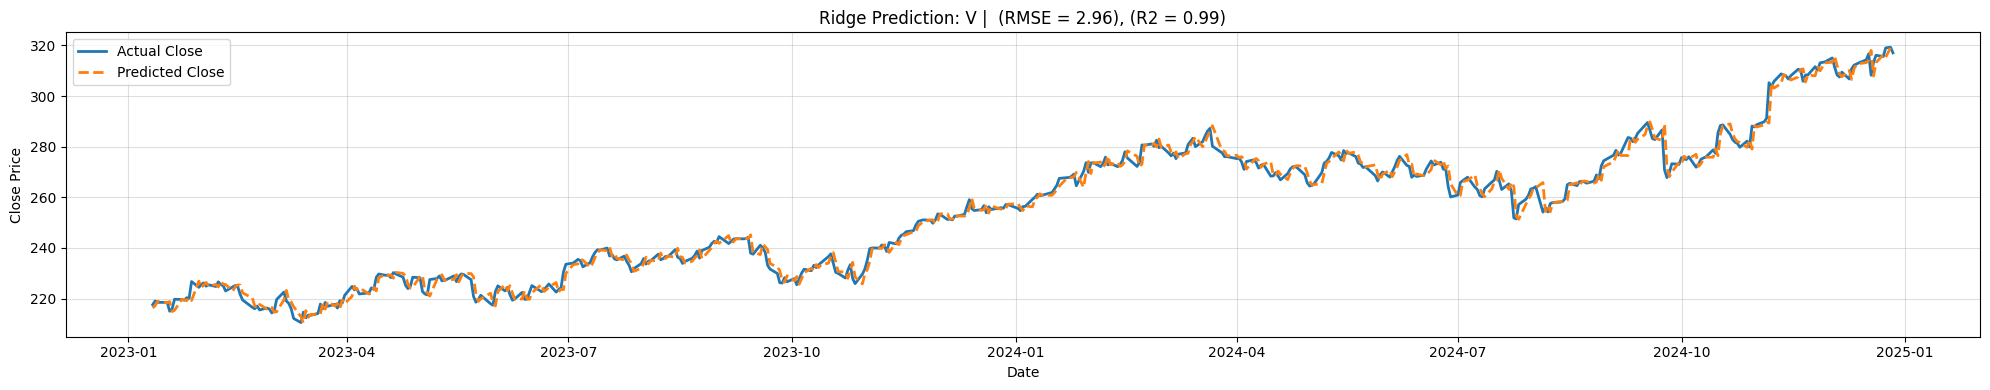

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing UNH ---


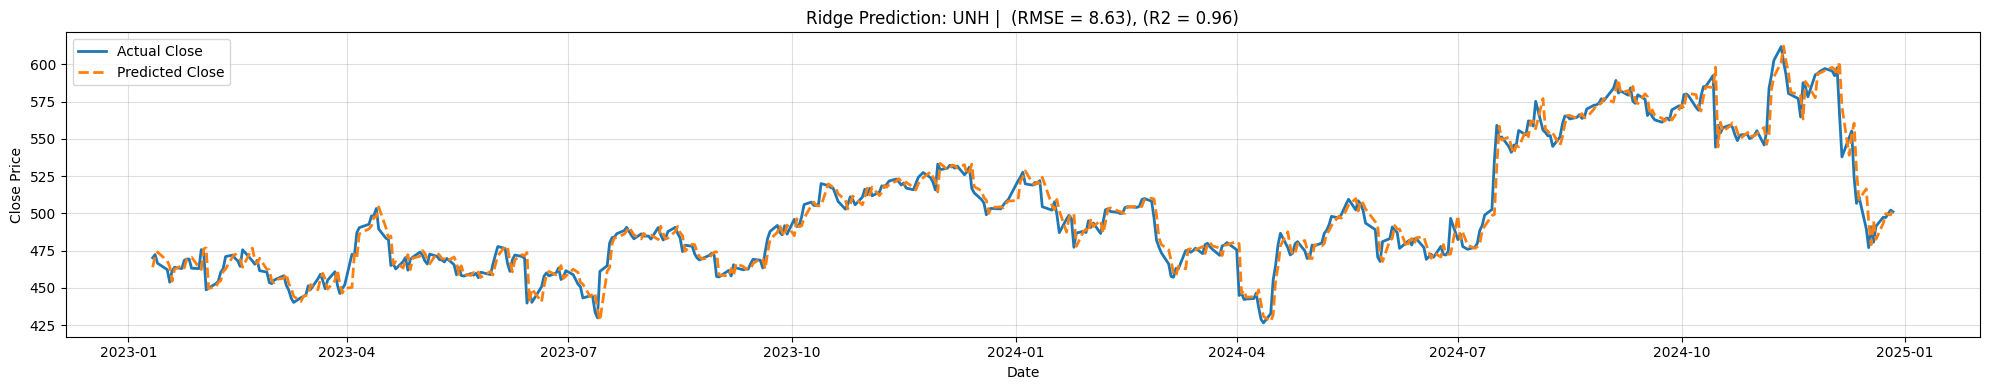

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing HD ---


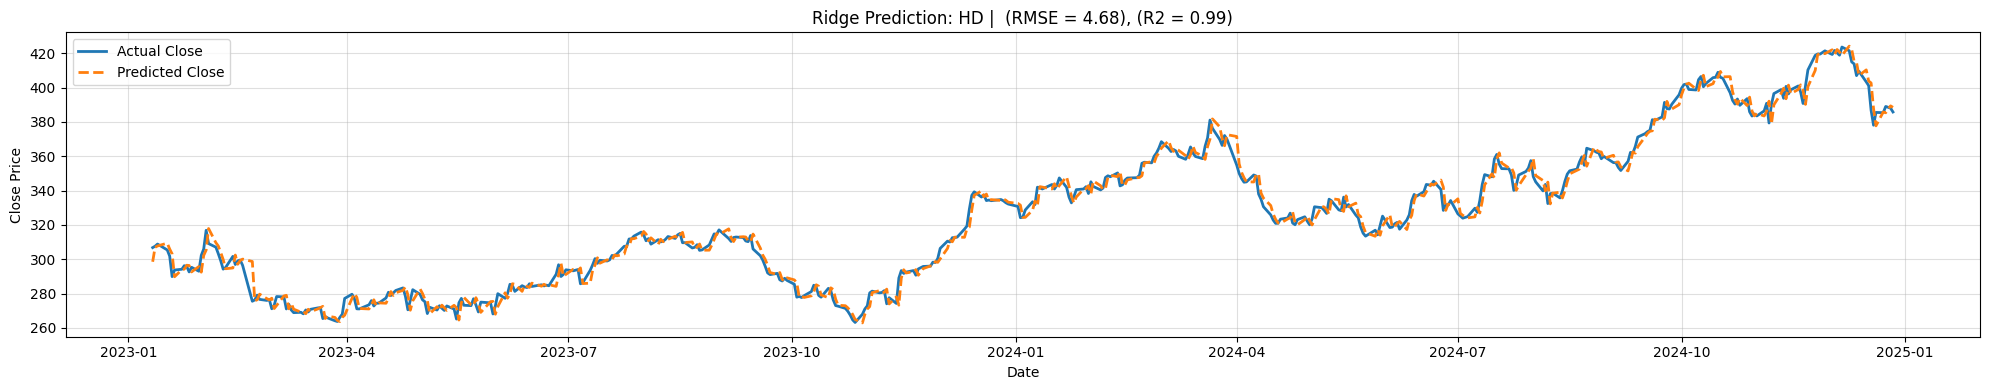

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing PG ---


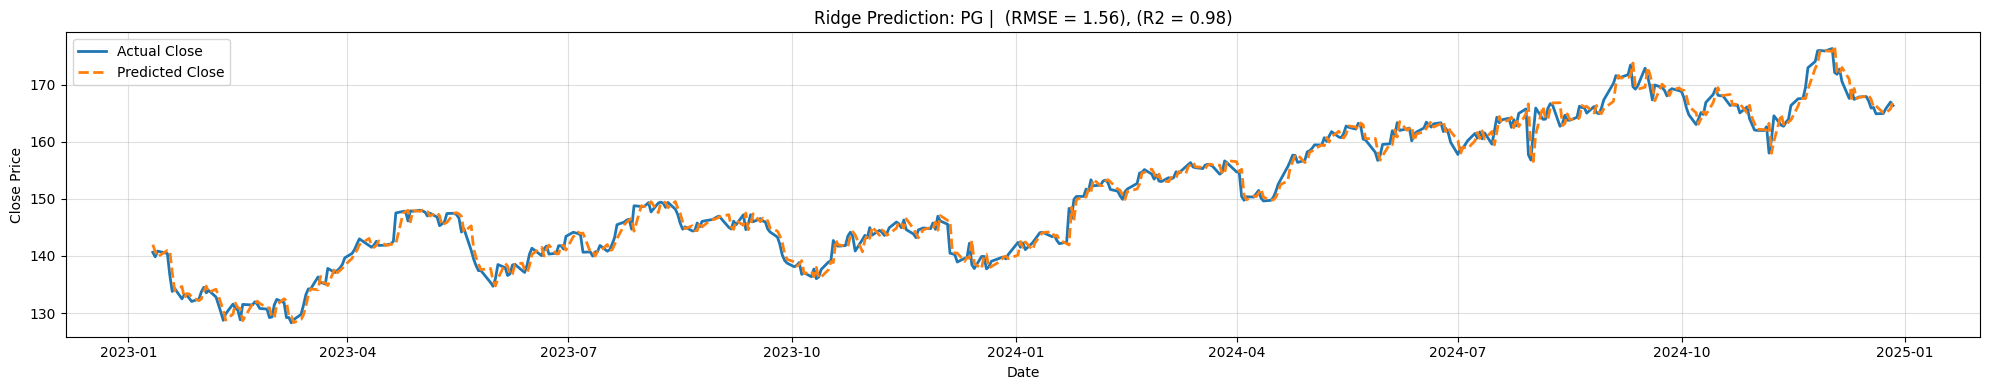

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing DIS ---


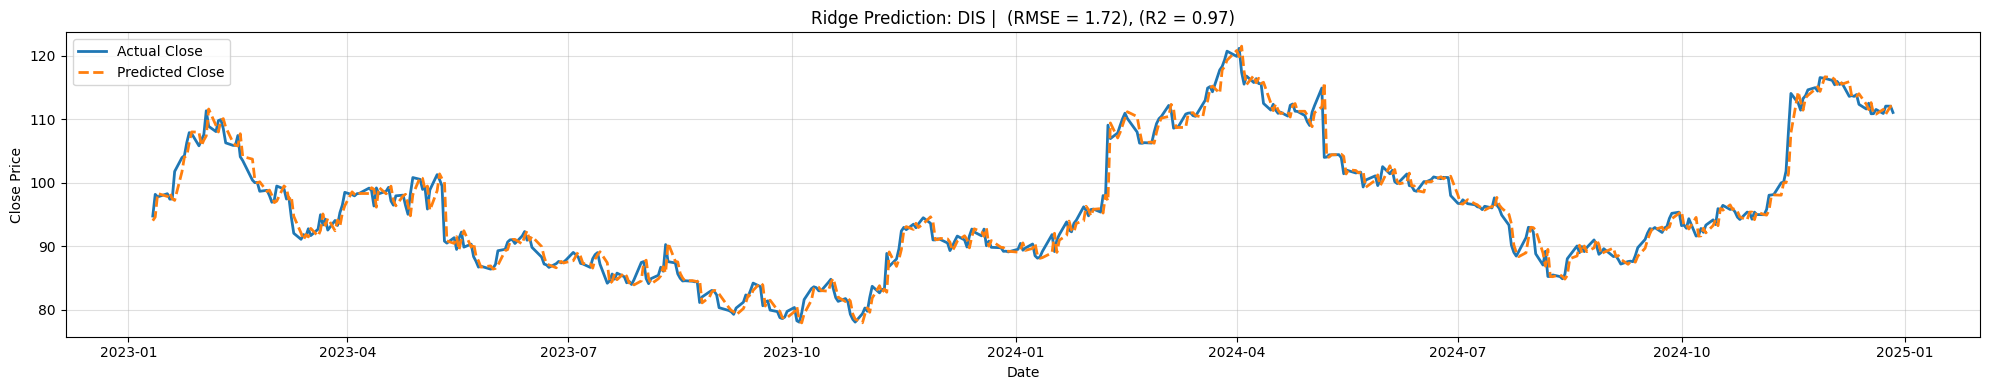

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing MA ---


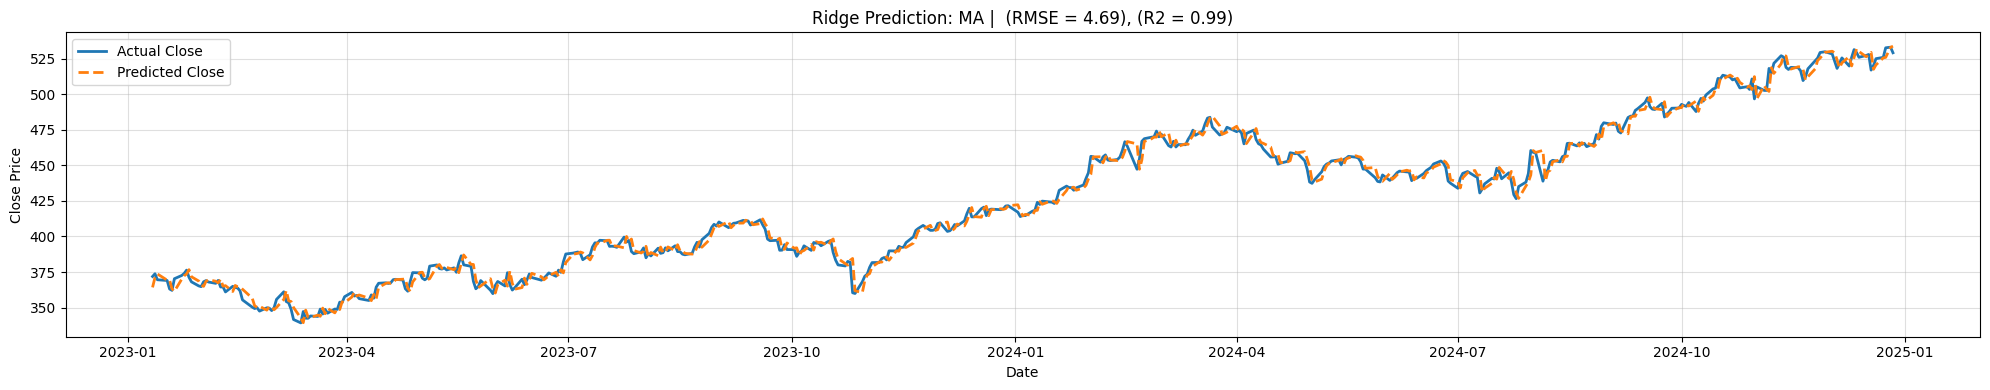

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing BAC ---


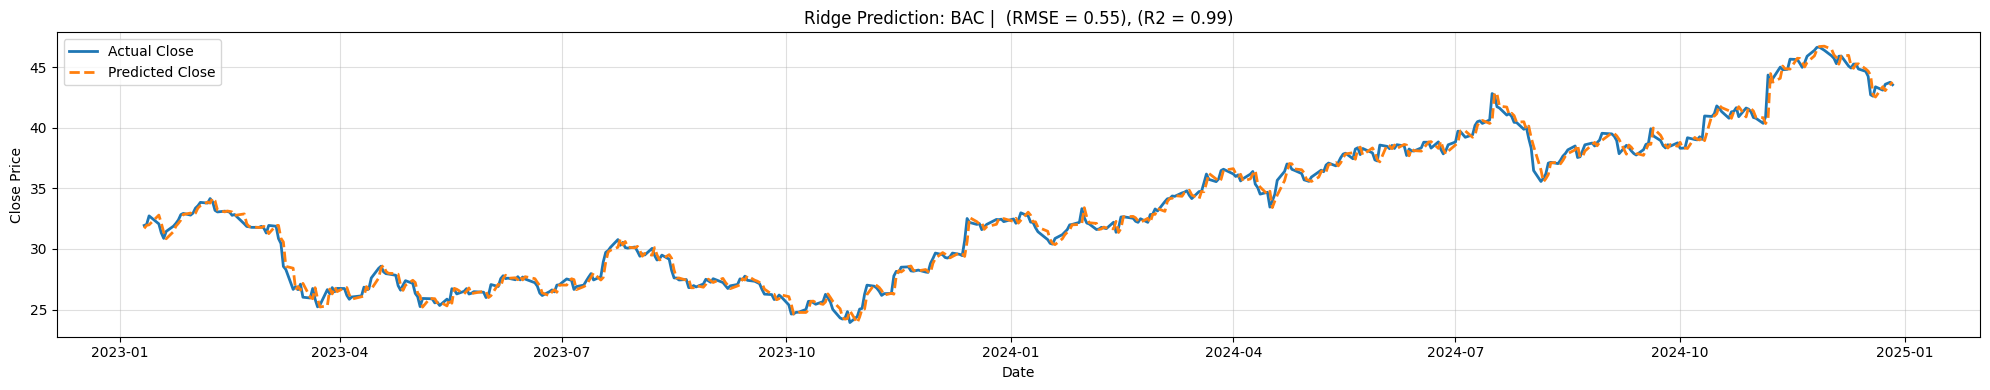

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing NFLX ---


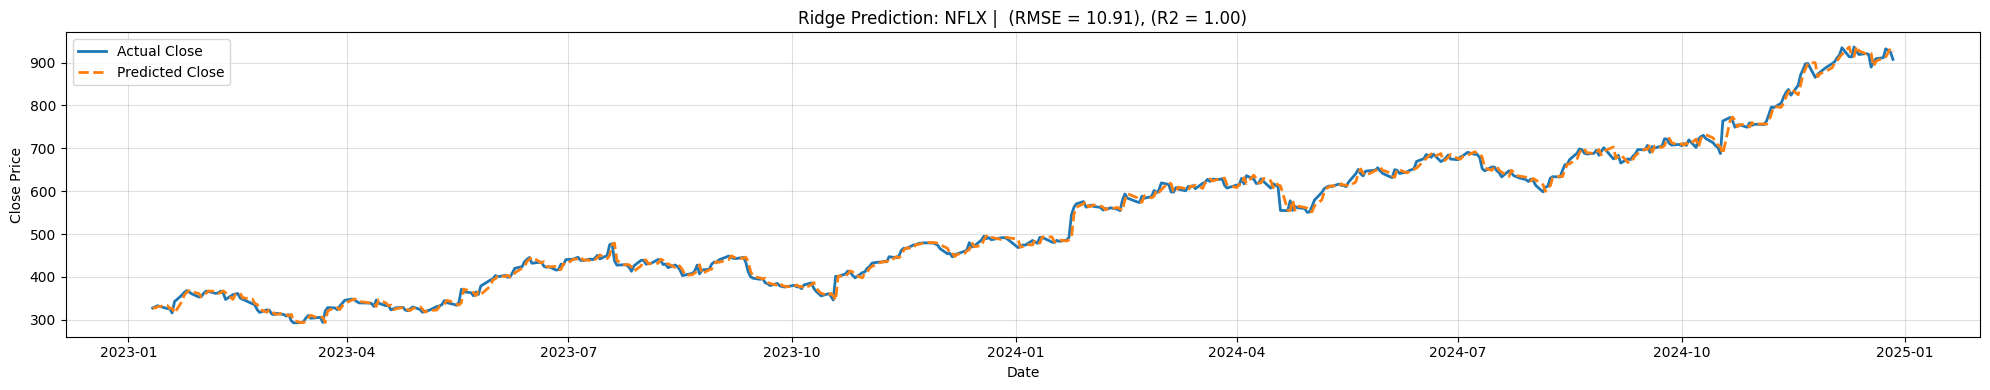

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing ADBE ---


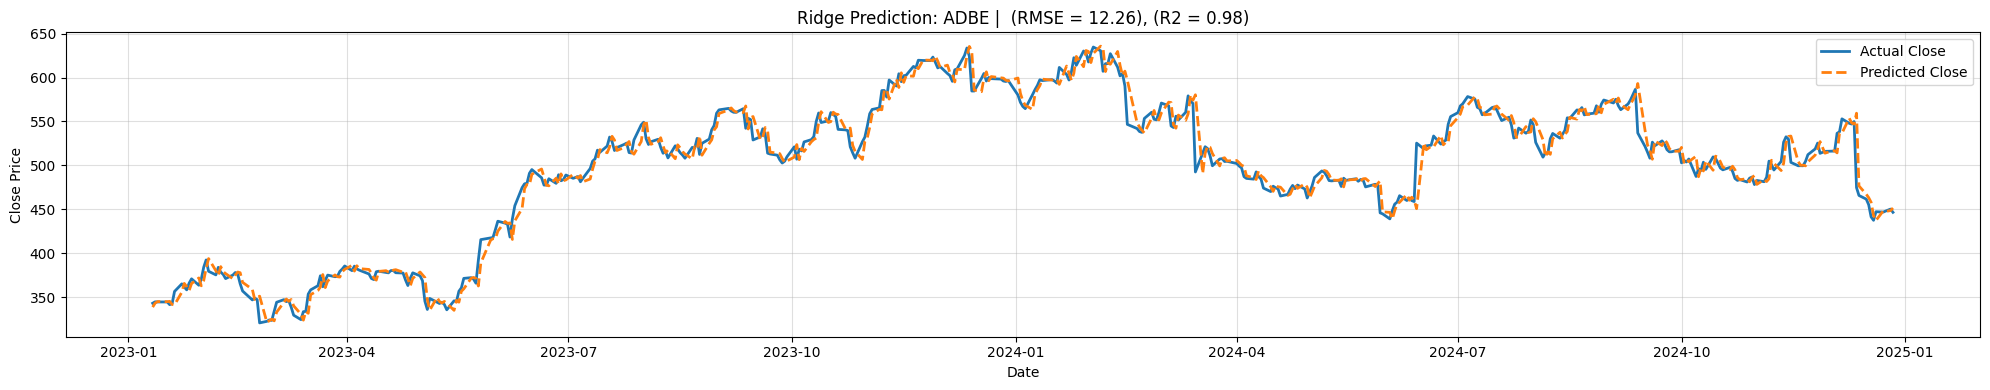

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing PYPL ---


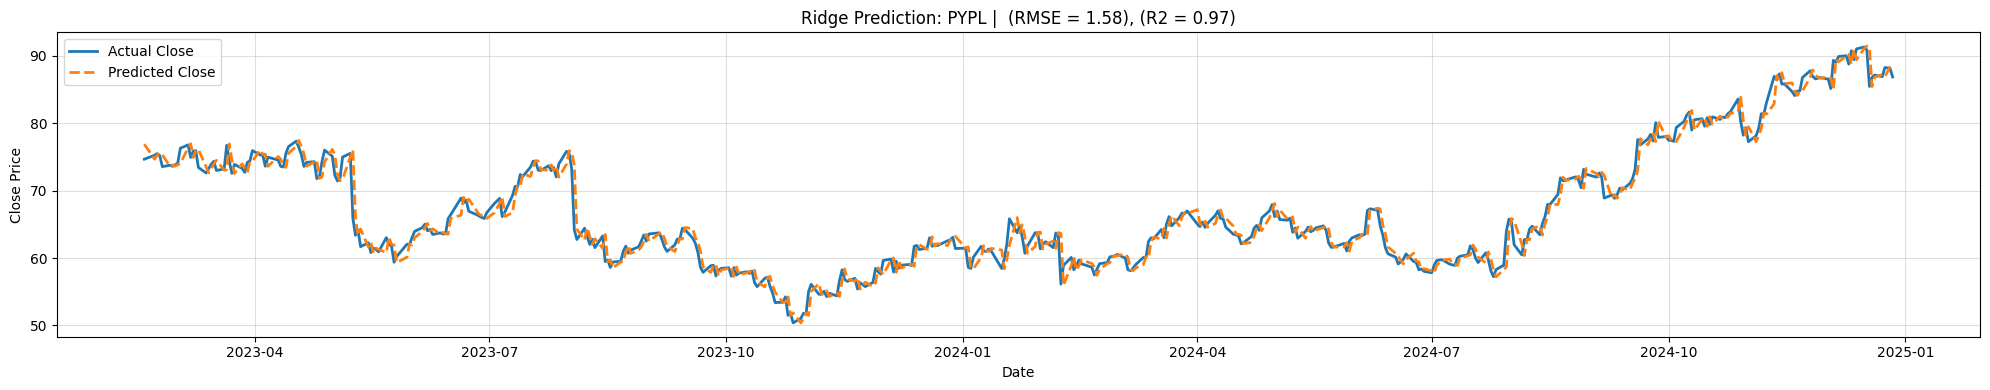

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing CMCSA ---


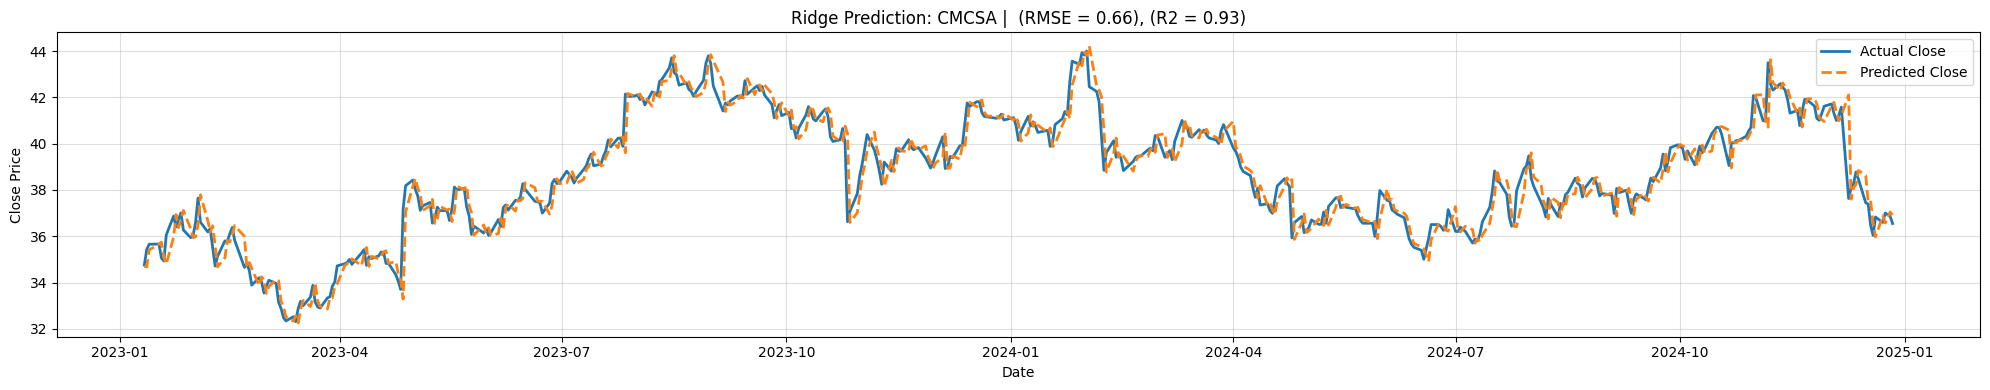

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing XOM ---


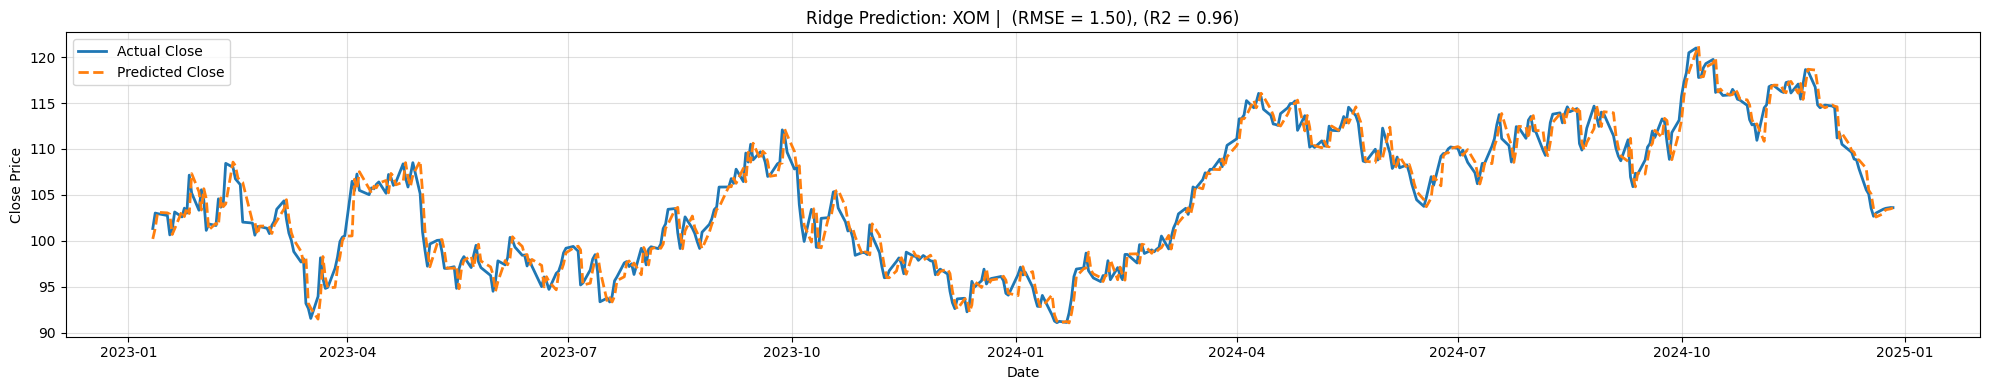

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing PFE ---


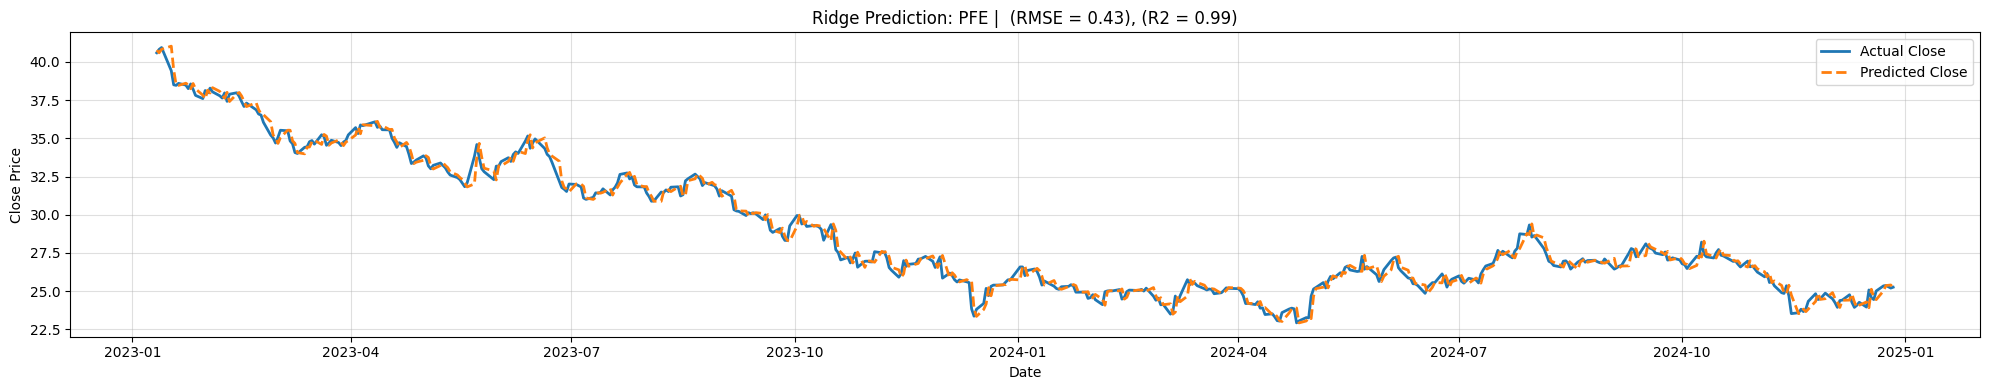

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing KO ---


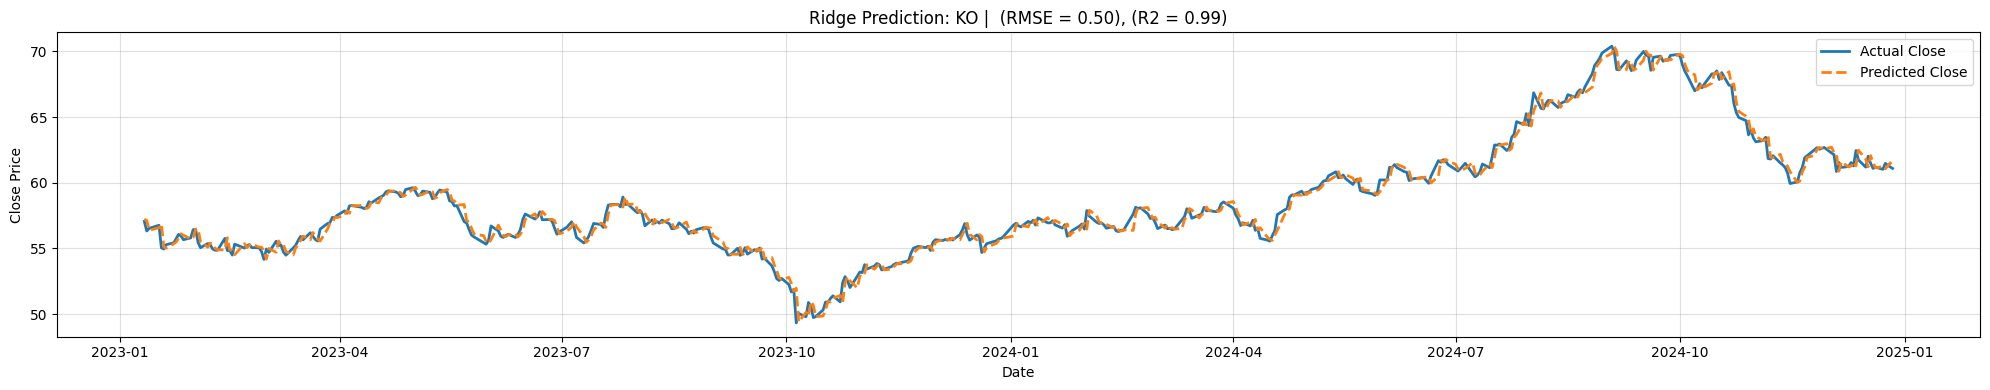

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing INTC ---


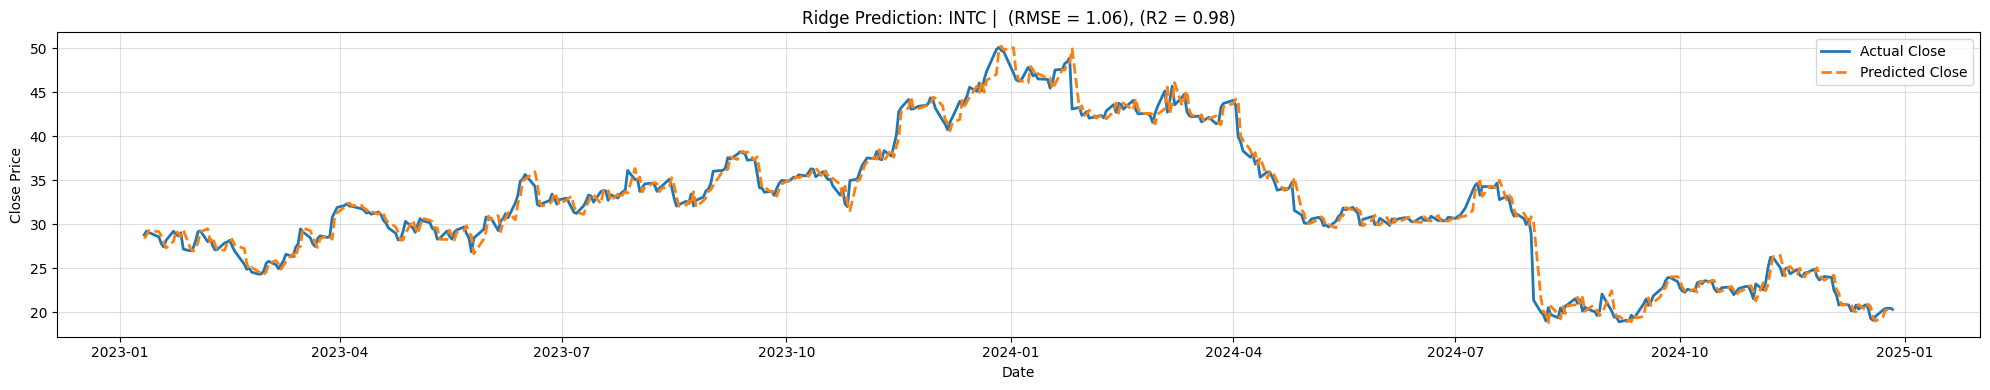

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing CSCO ---


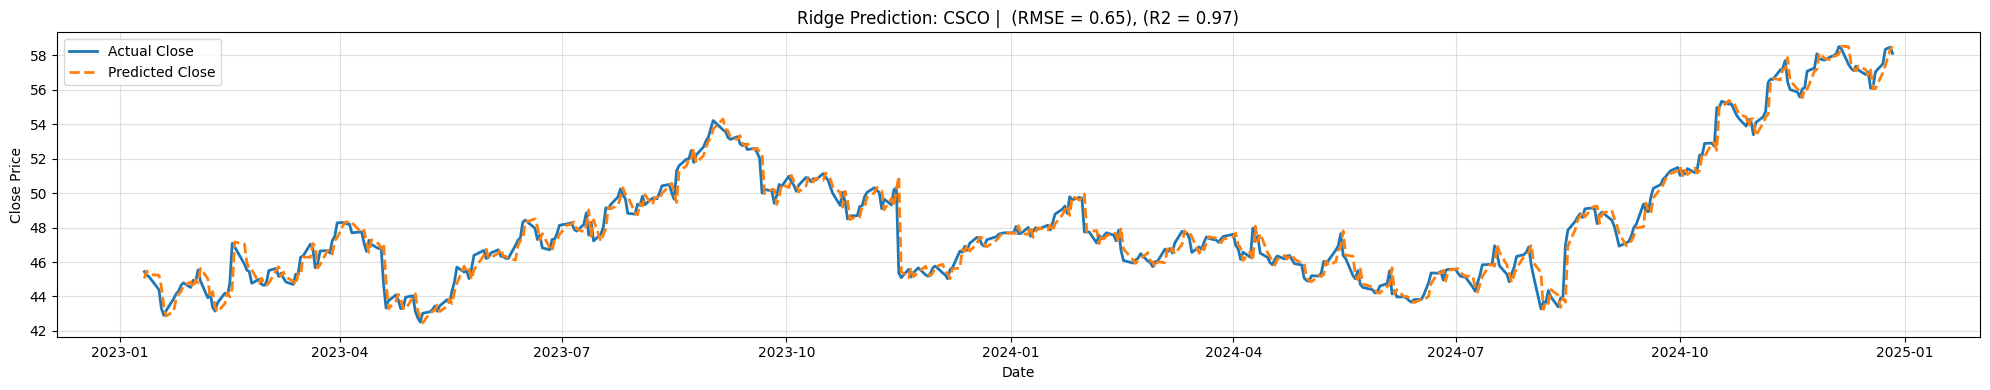

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing NKE ---


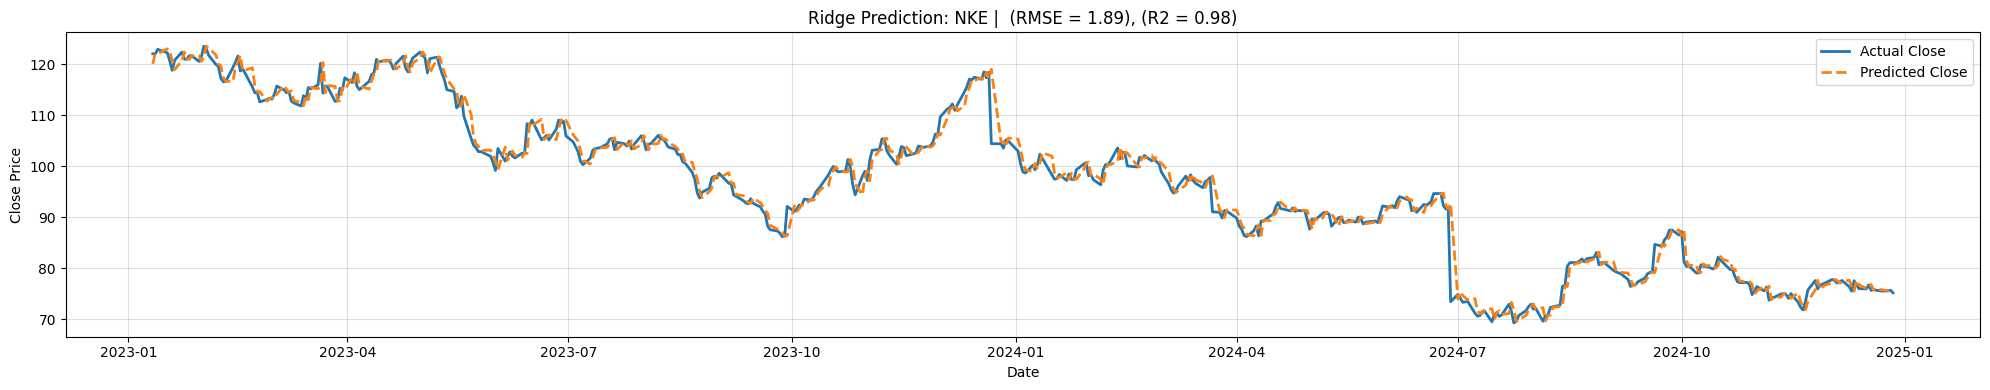

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing MRK ---


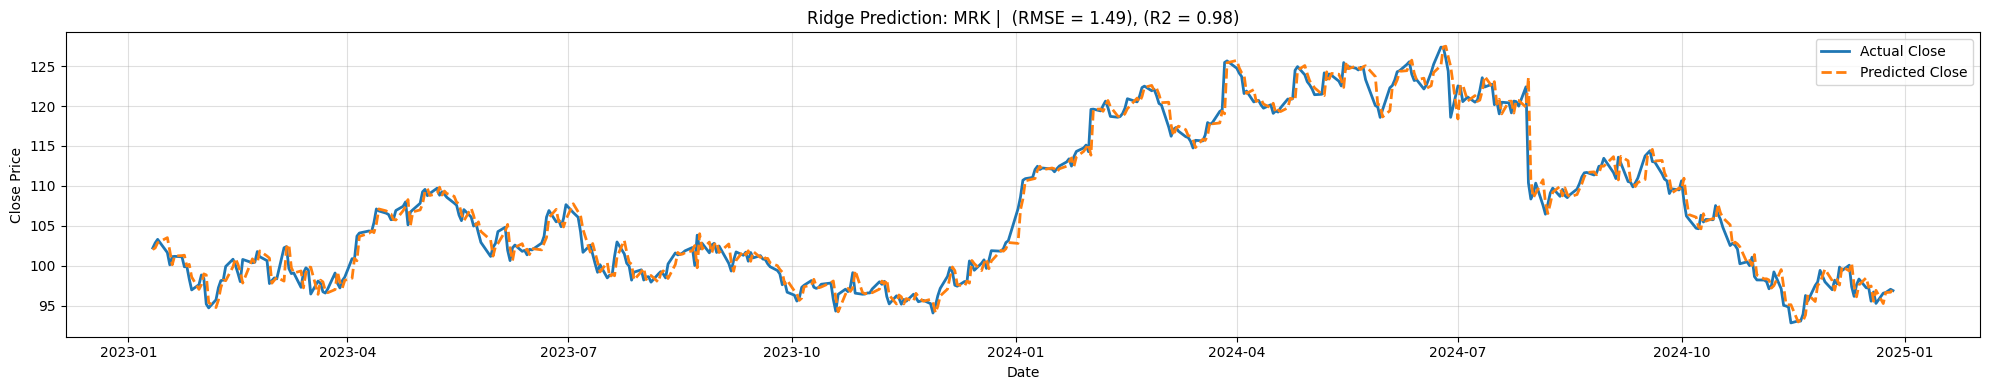

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing PEP ---


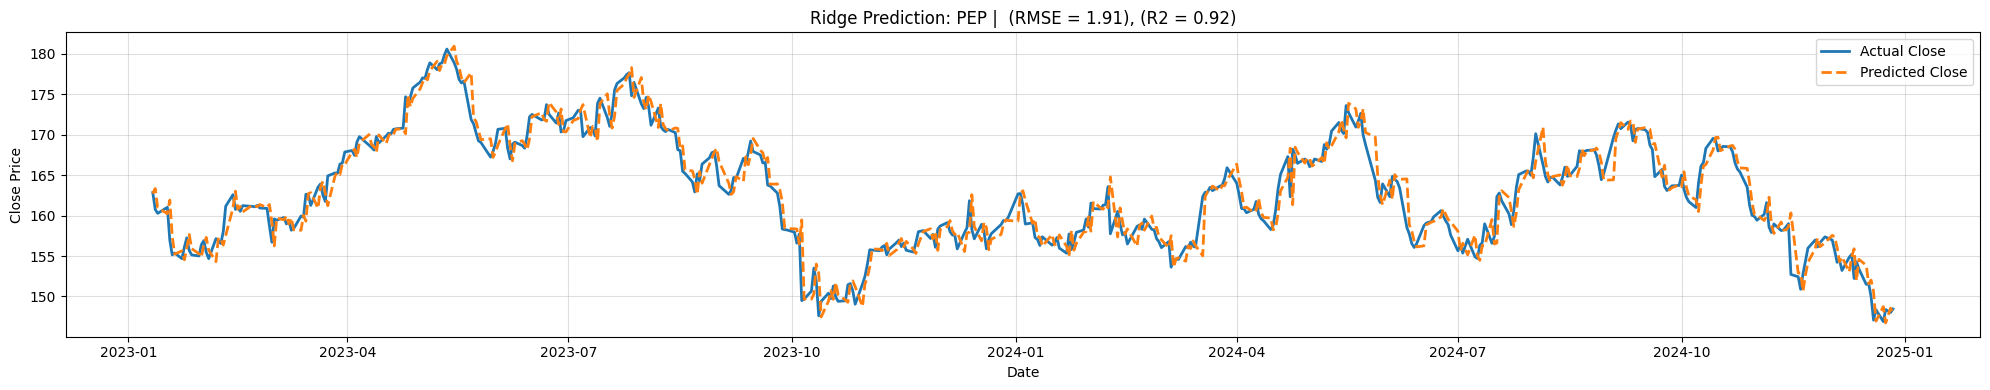

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing ABBV ---


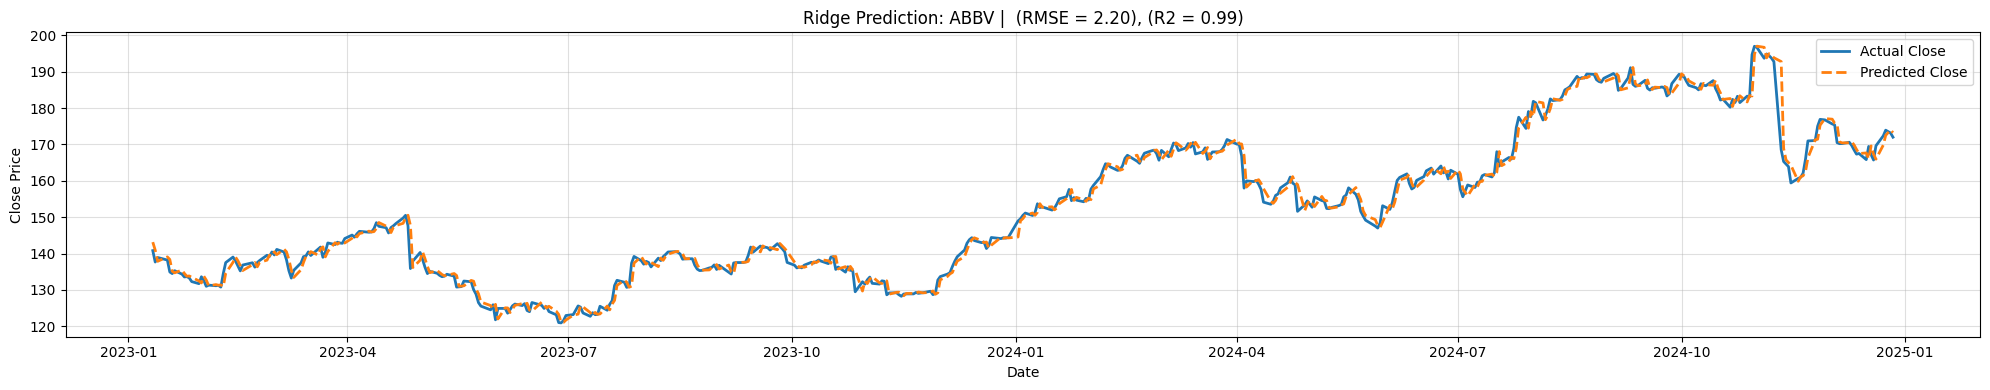

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing ABT ---


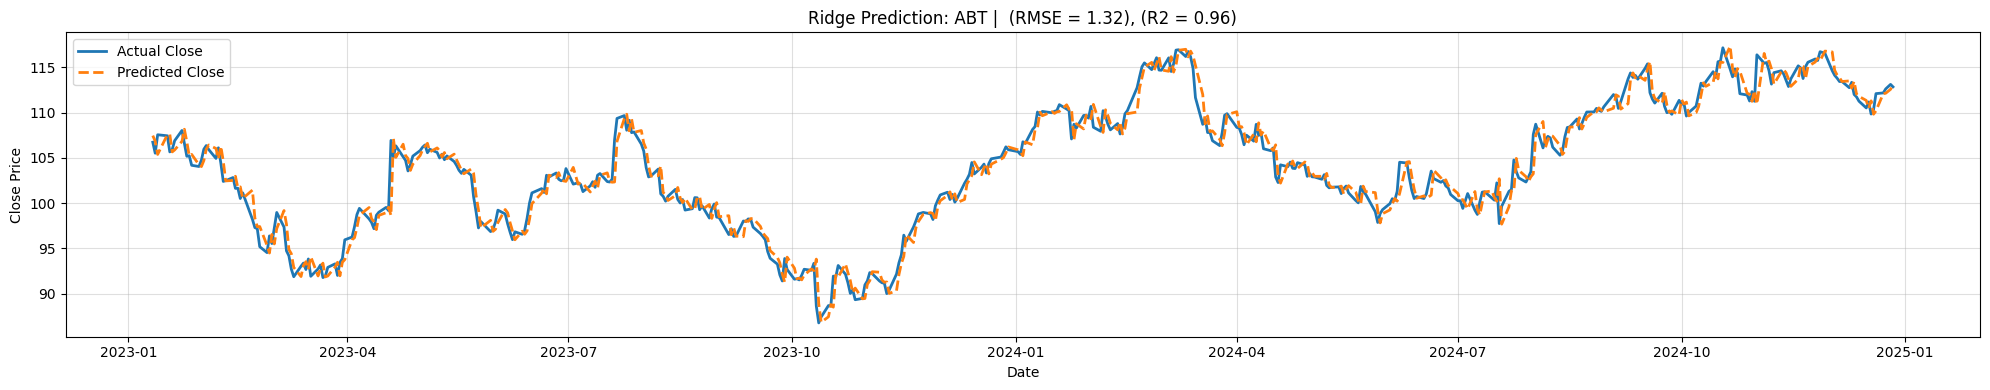

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing CRM ---


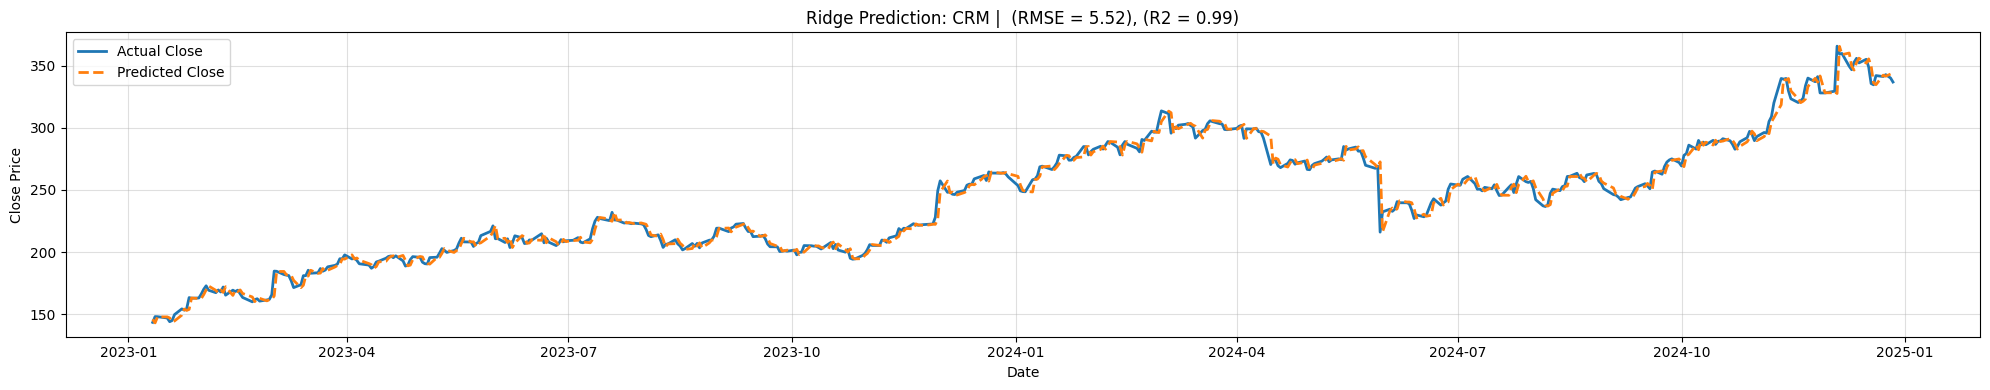

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing ORCL ---


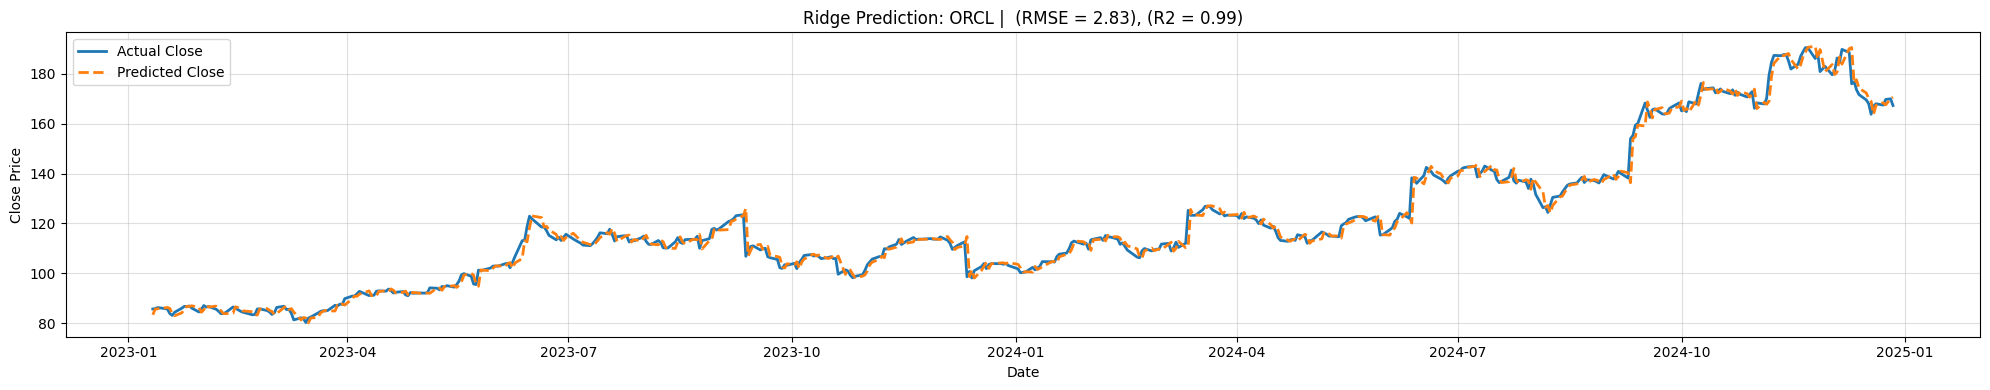

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing T ---


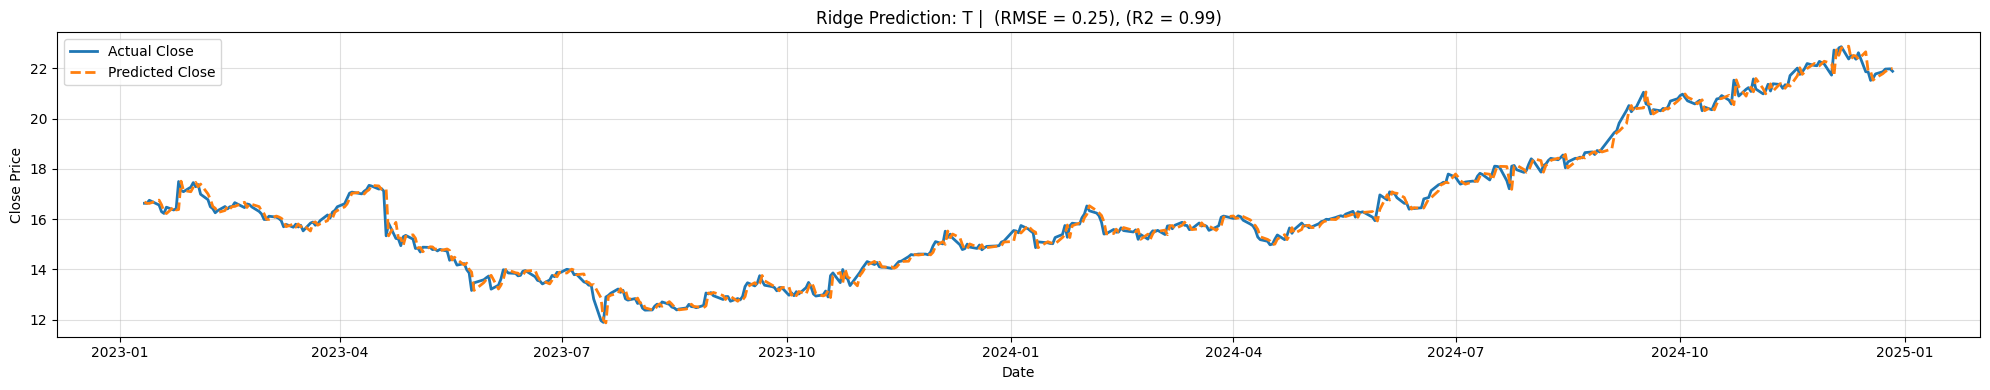

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing VZ ---


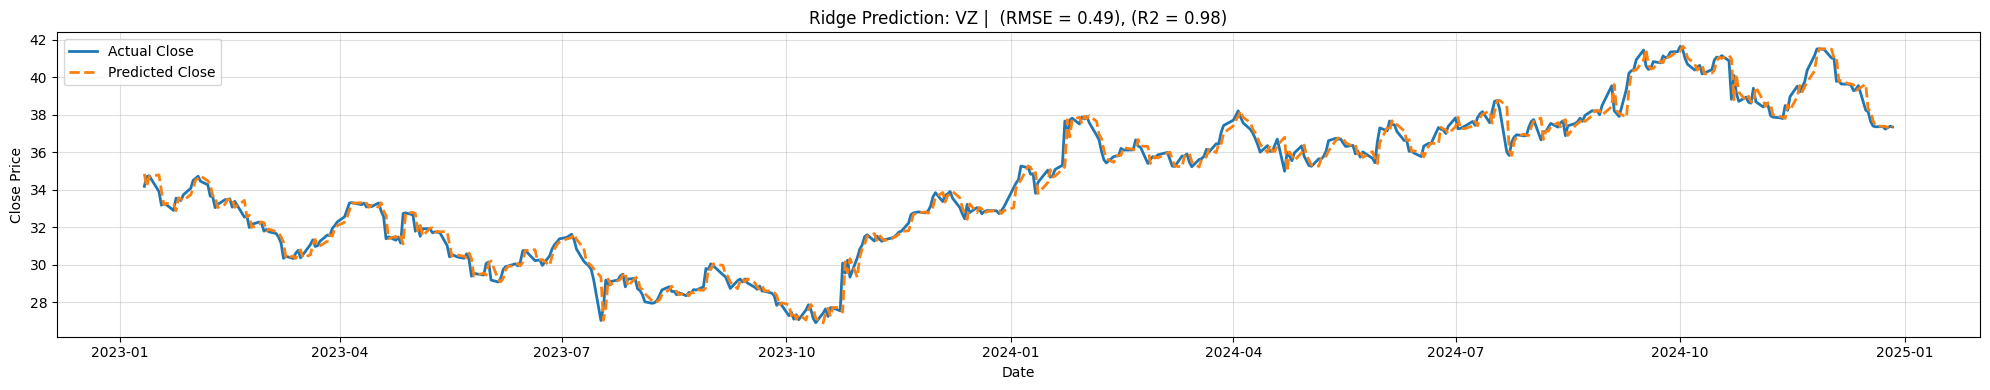

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing CVX ---


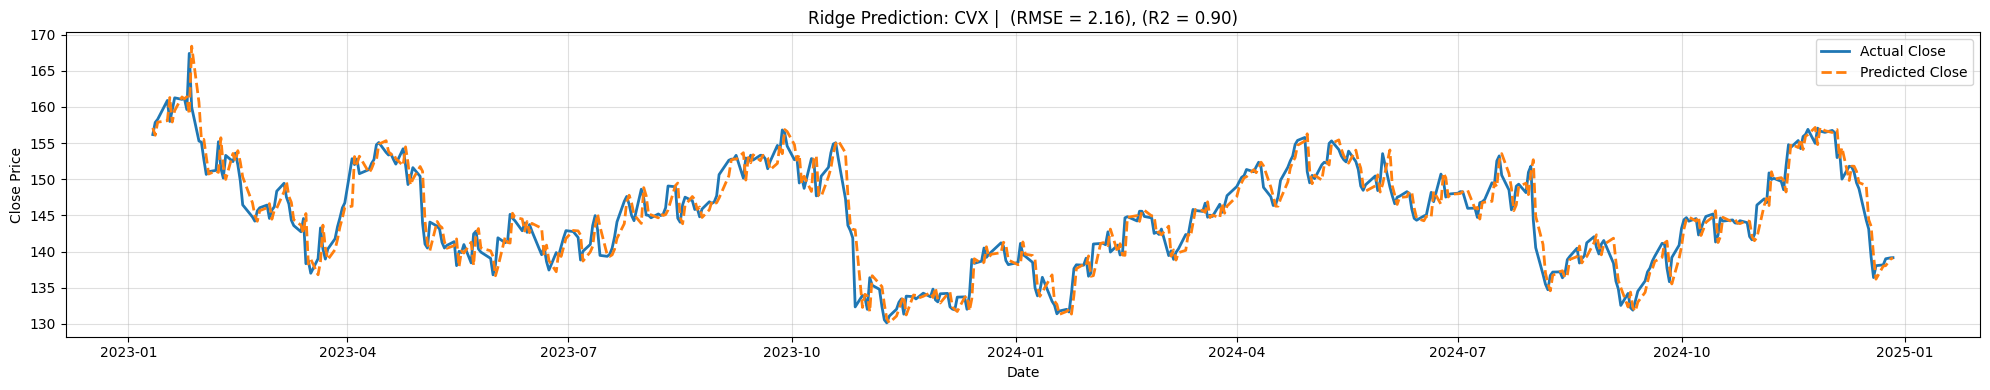

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing MCD ---


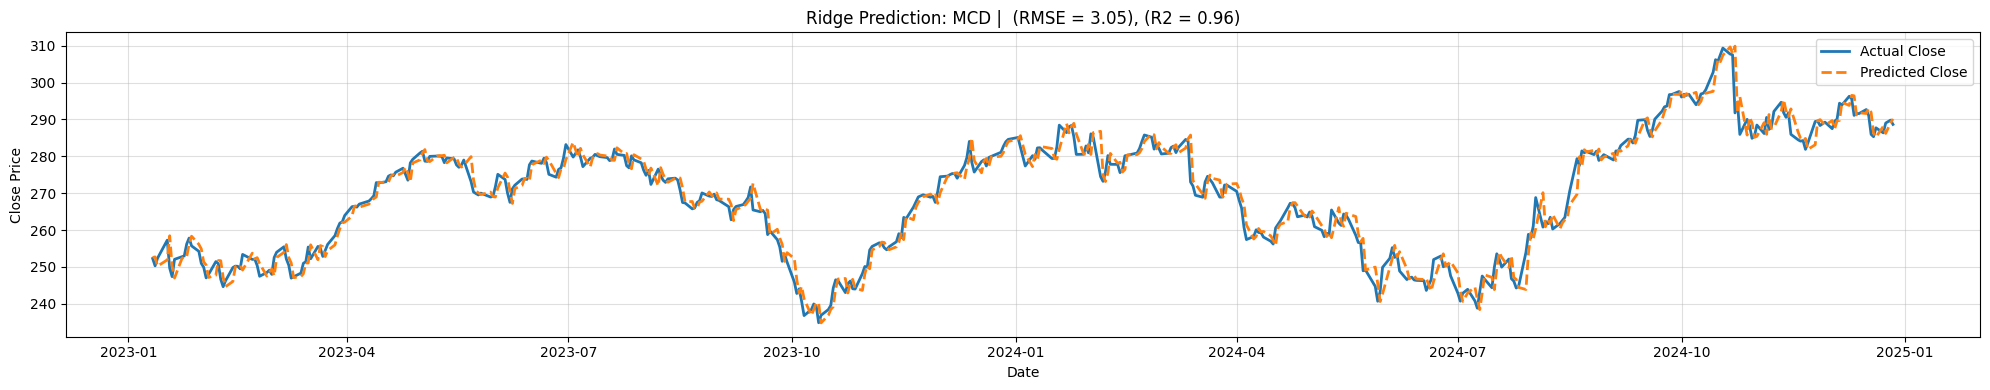

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing WMT ---


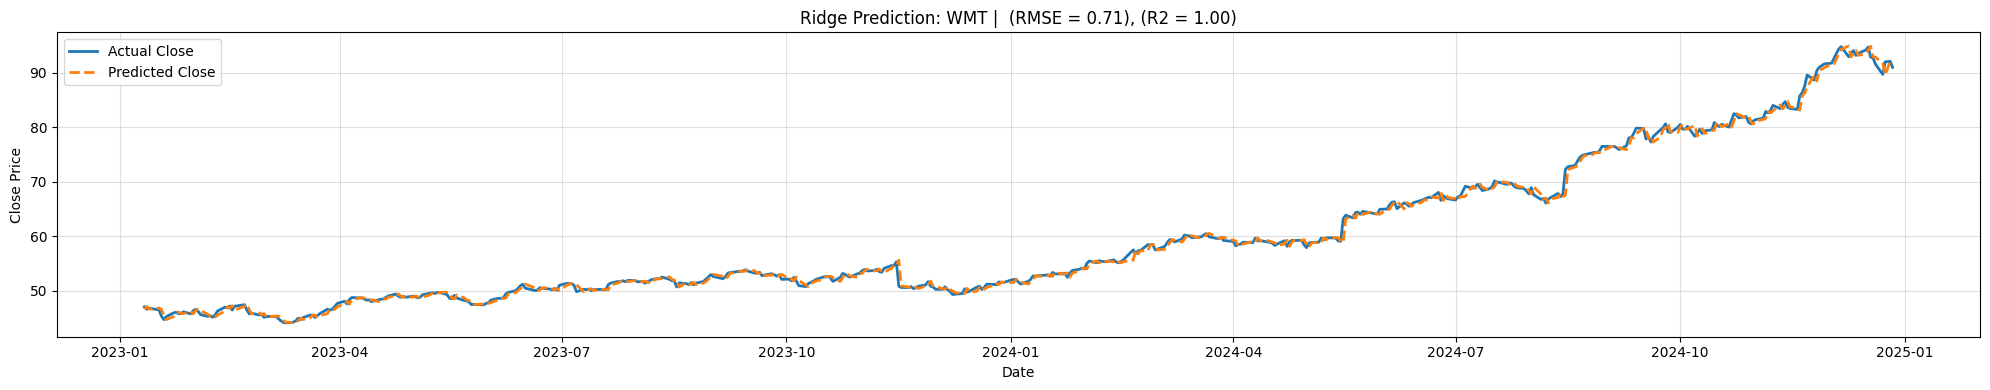

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing DHR ---


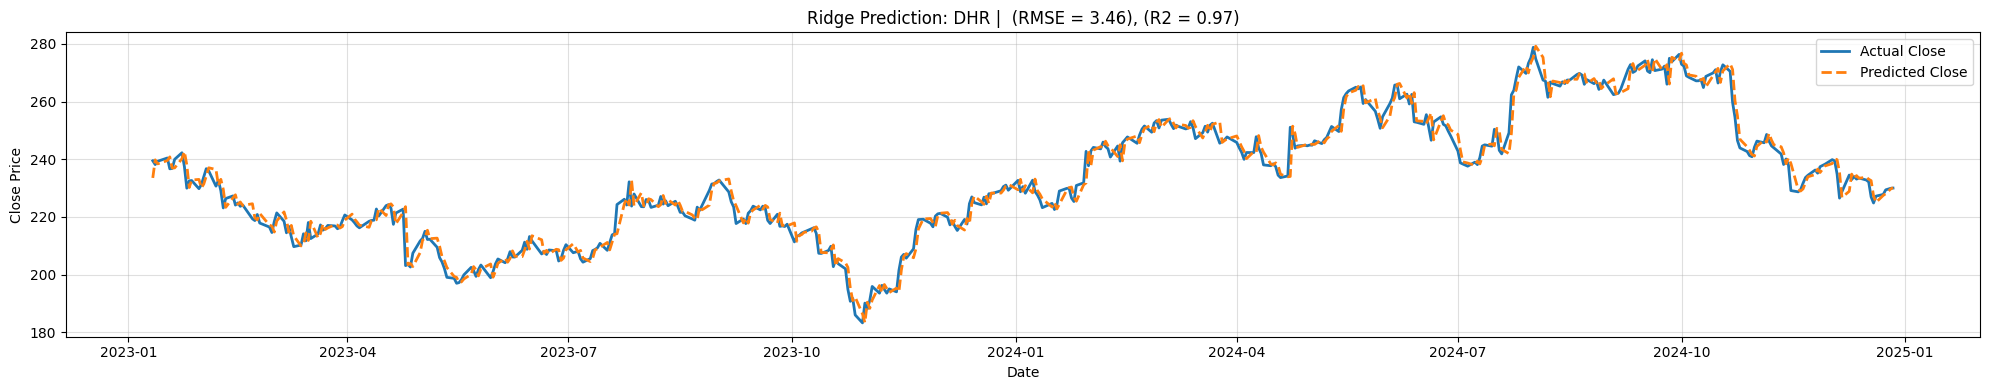

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing ACN ---


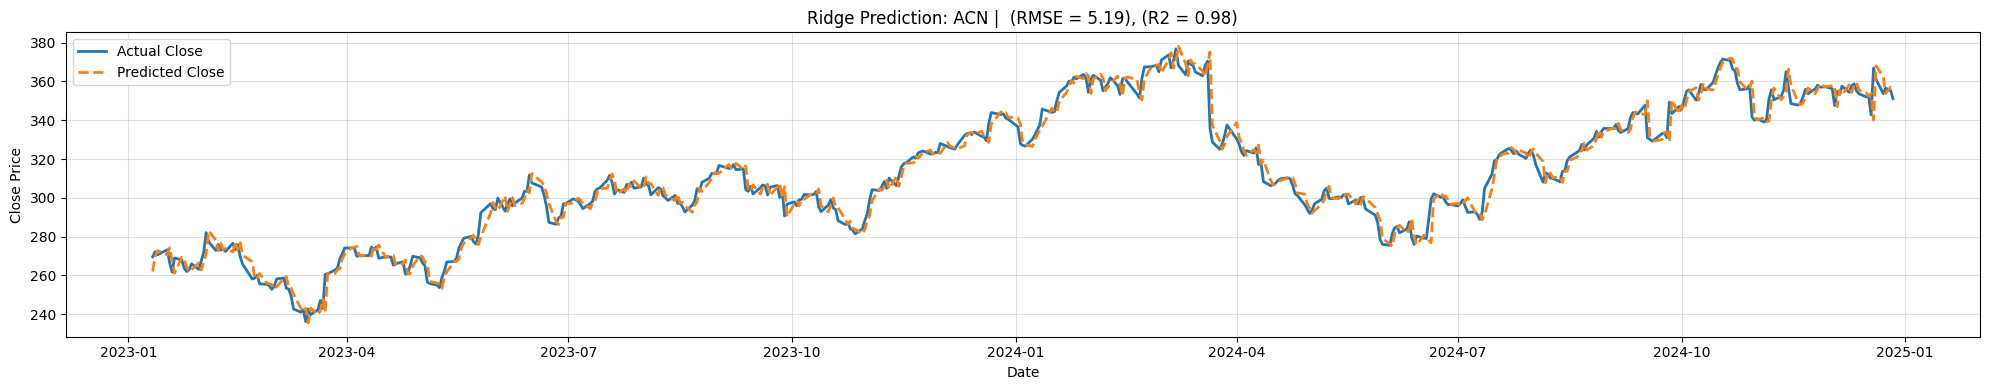

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing LLY ---


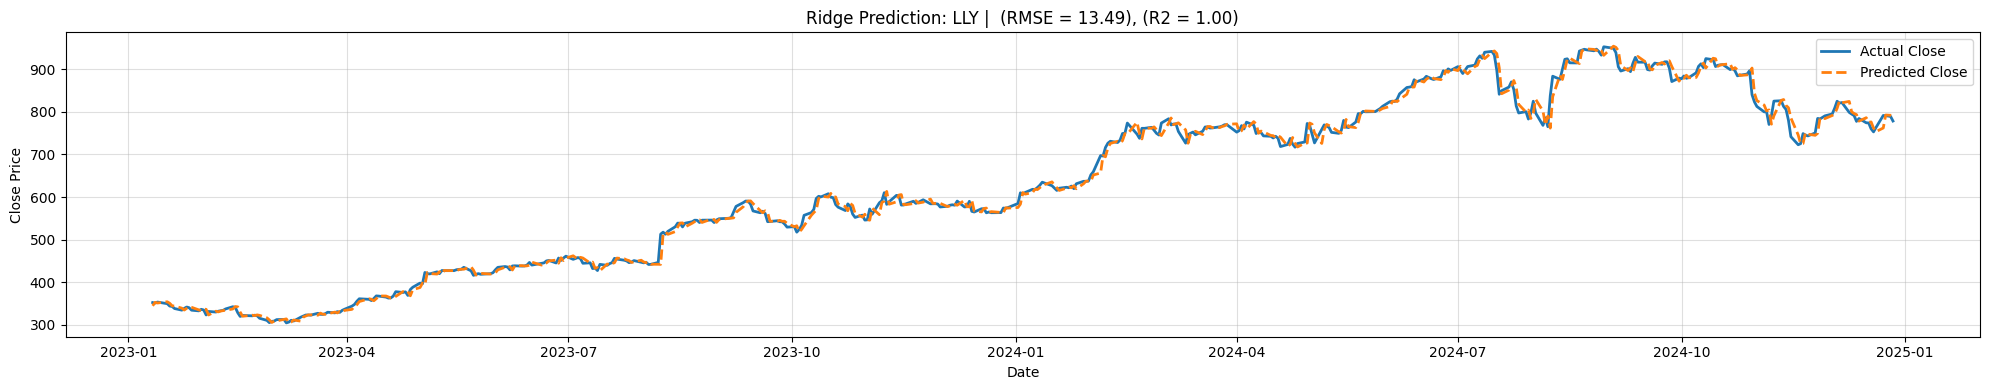

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing AVGO ---


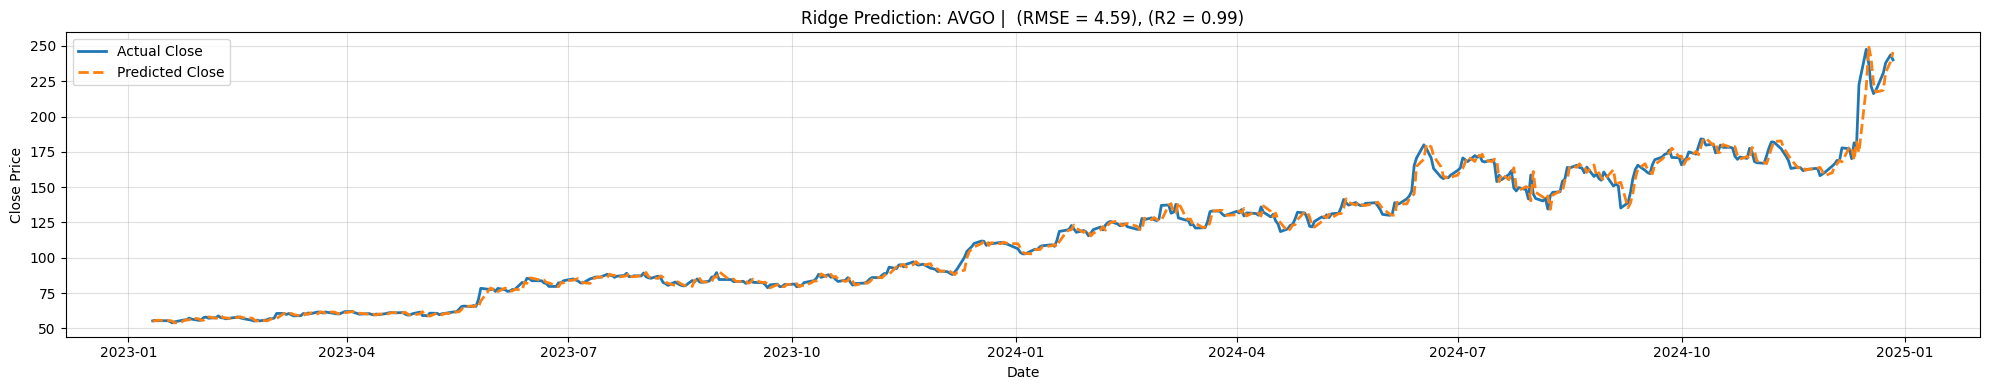

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing QCOM ---


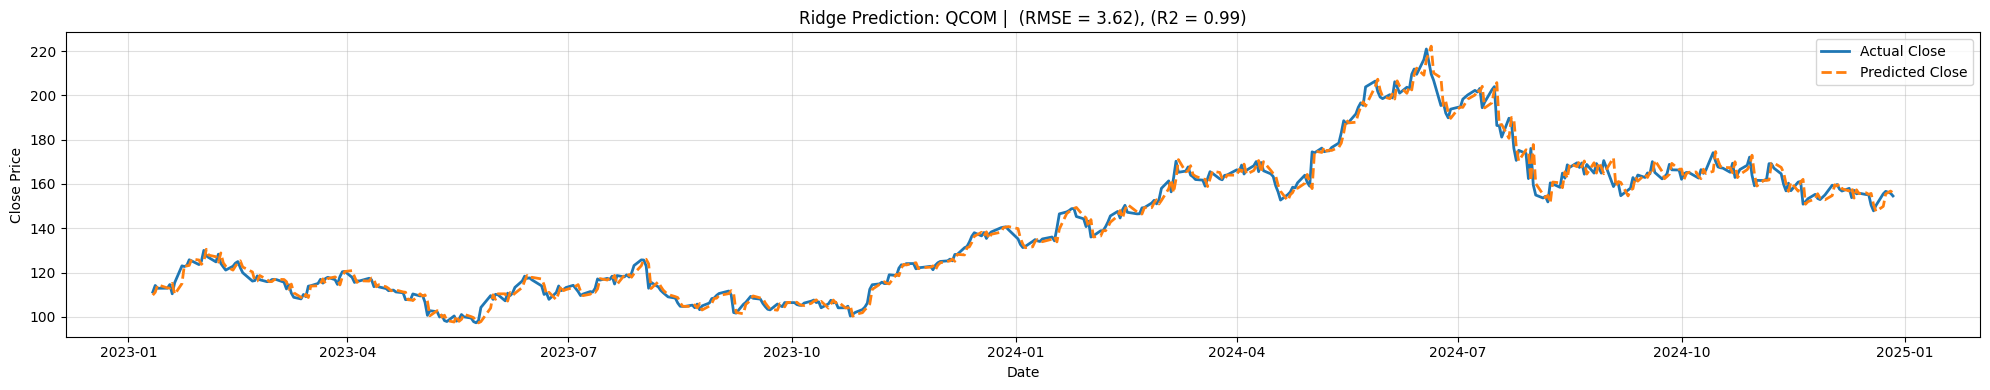

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing TXN ---


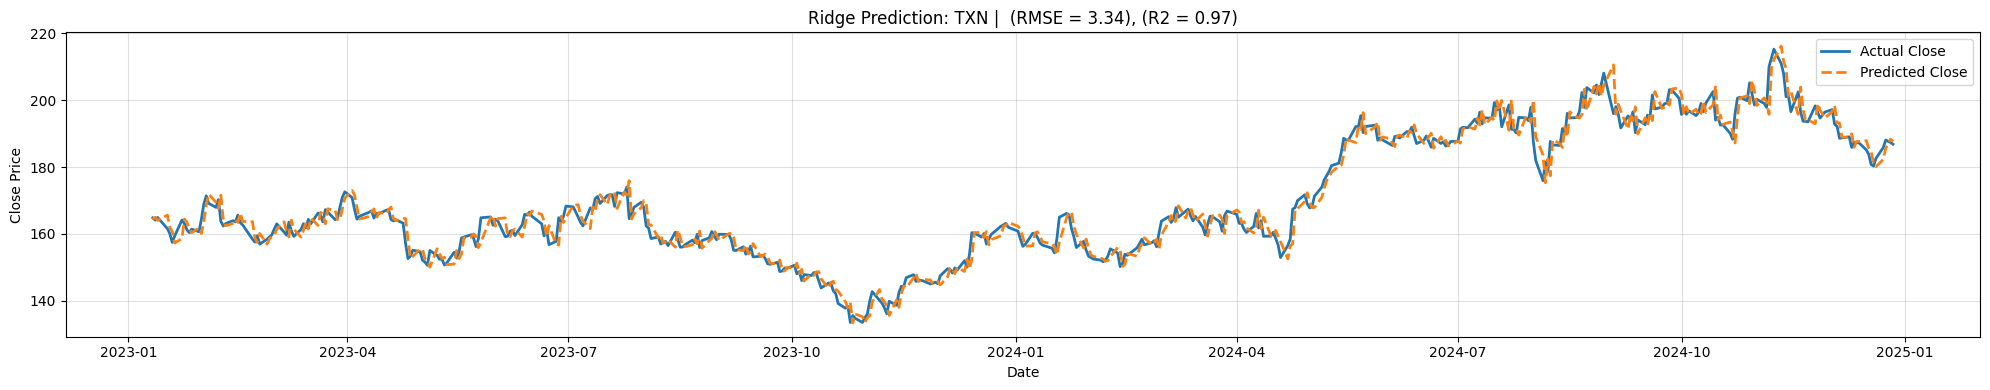

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing NEE ---


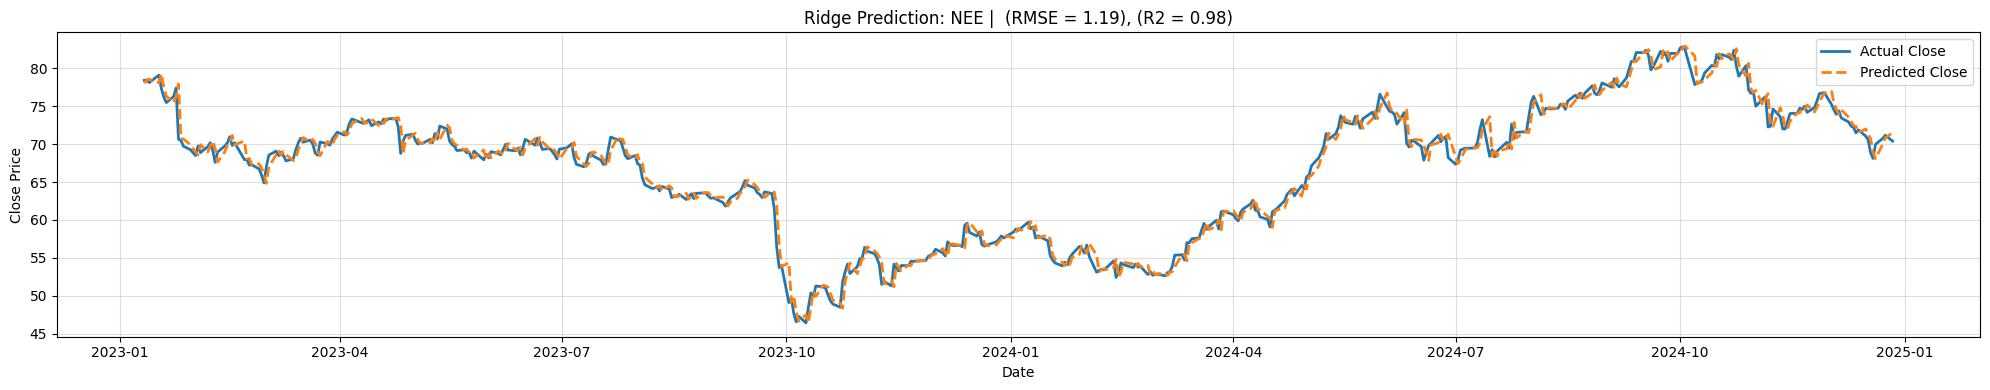

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing COST ---


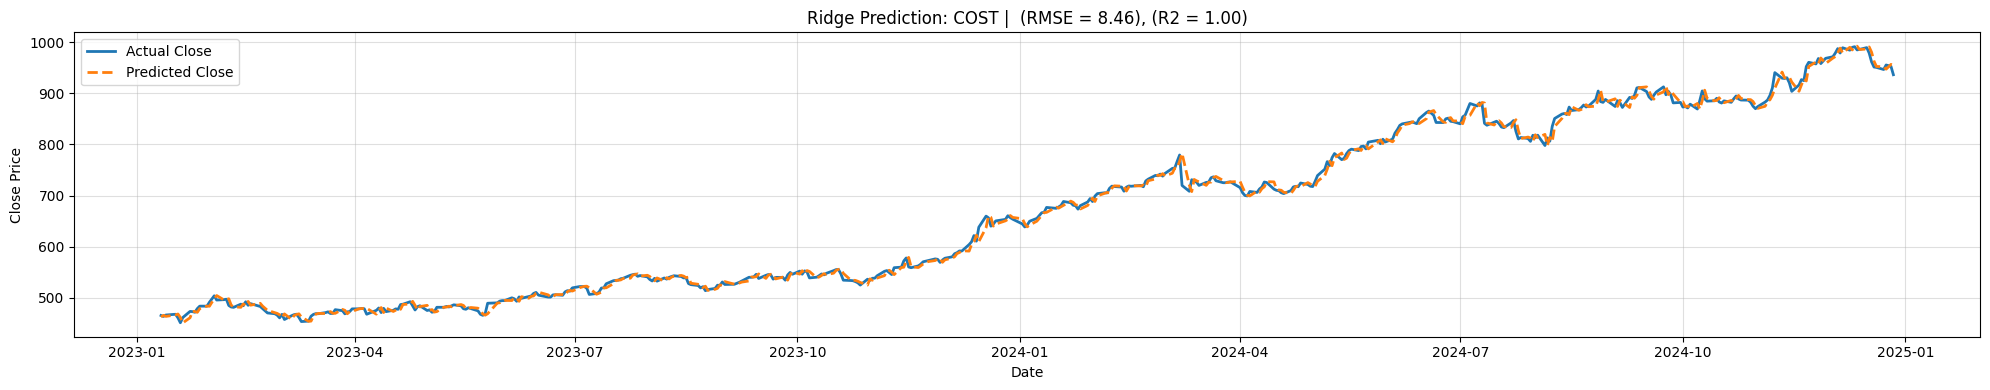

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing TMUS ---


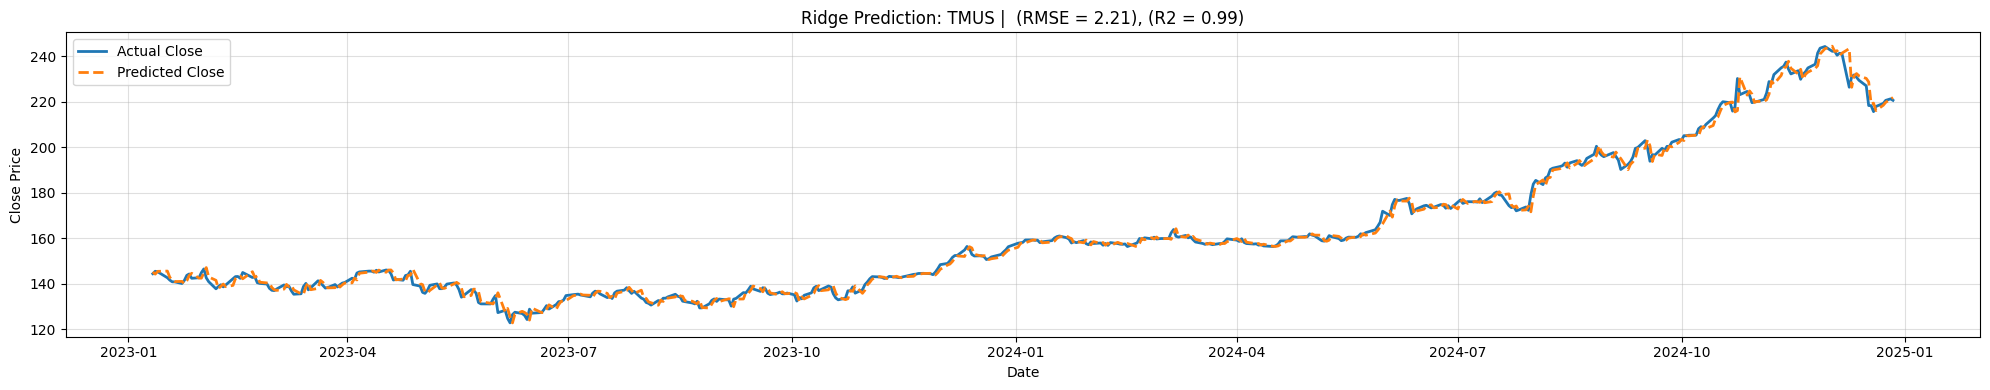

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing IBM ---


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing SBUX ---


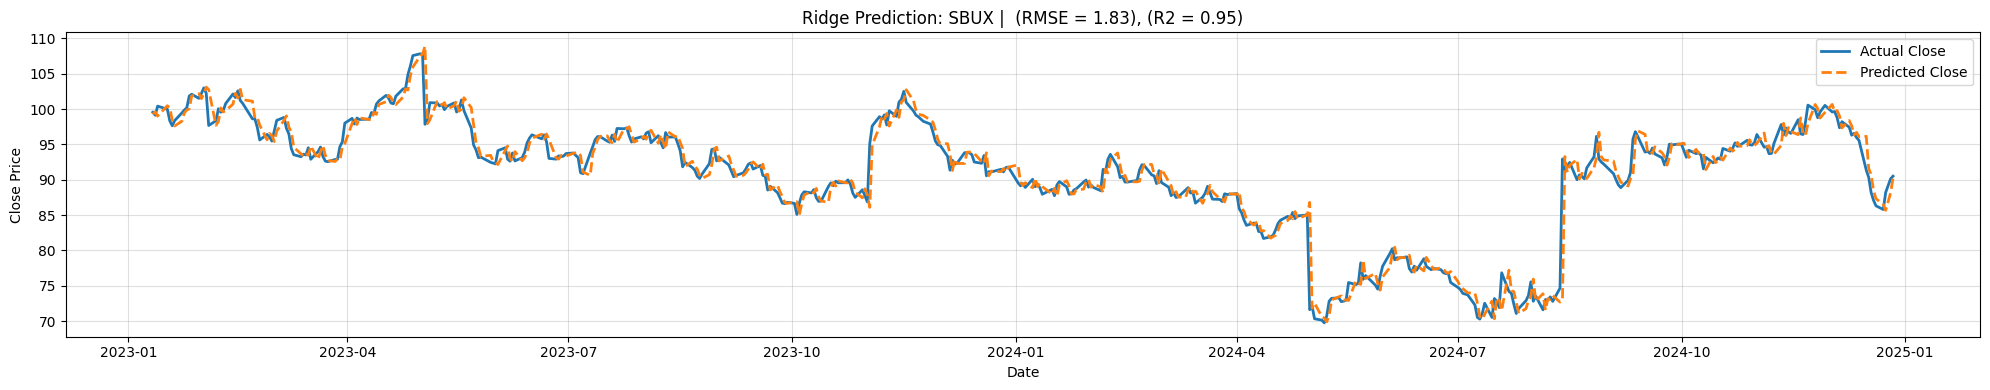

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing MDT ---


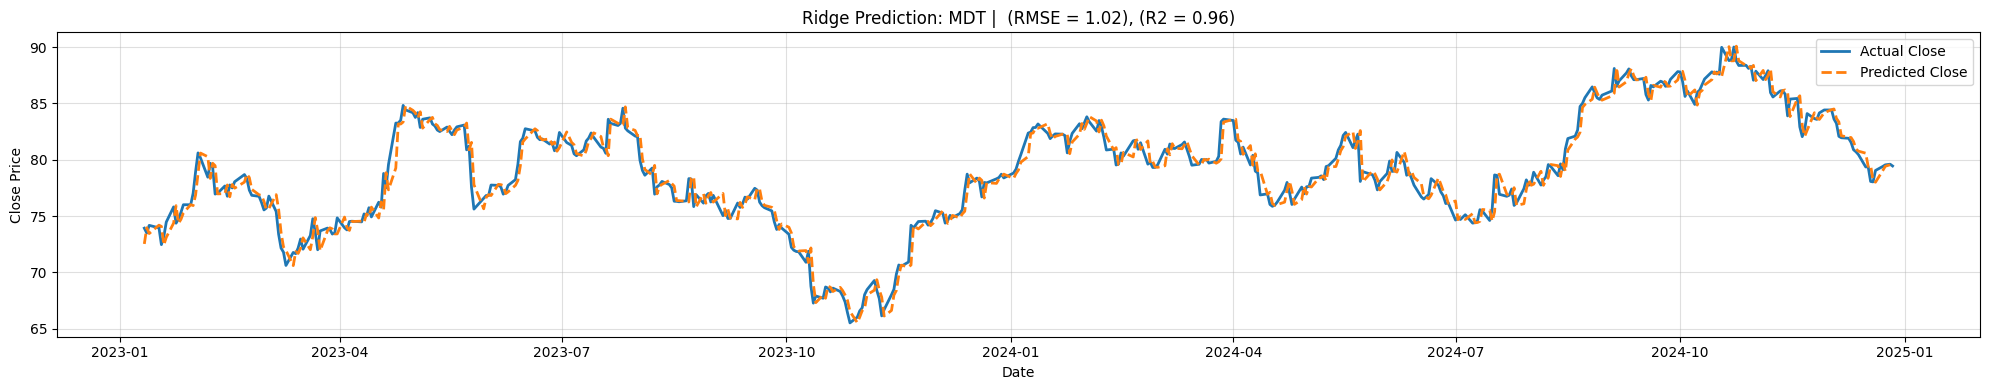

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing HON ---


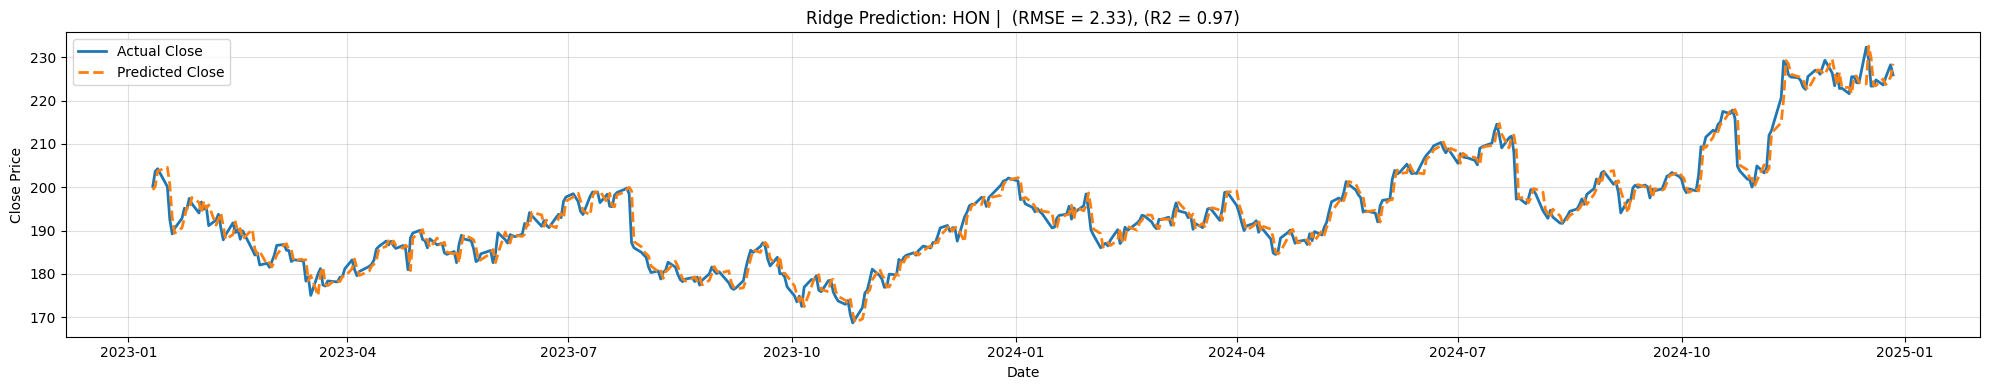

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

--- Processing AMD ---


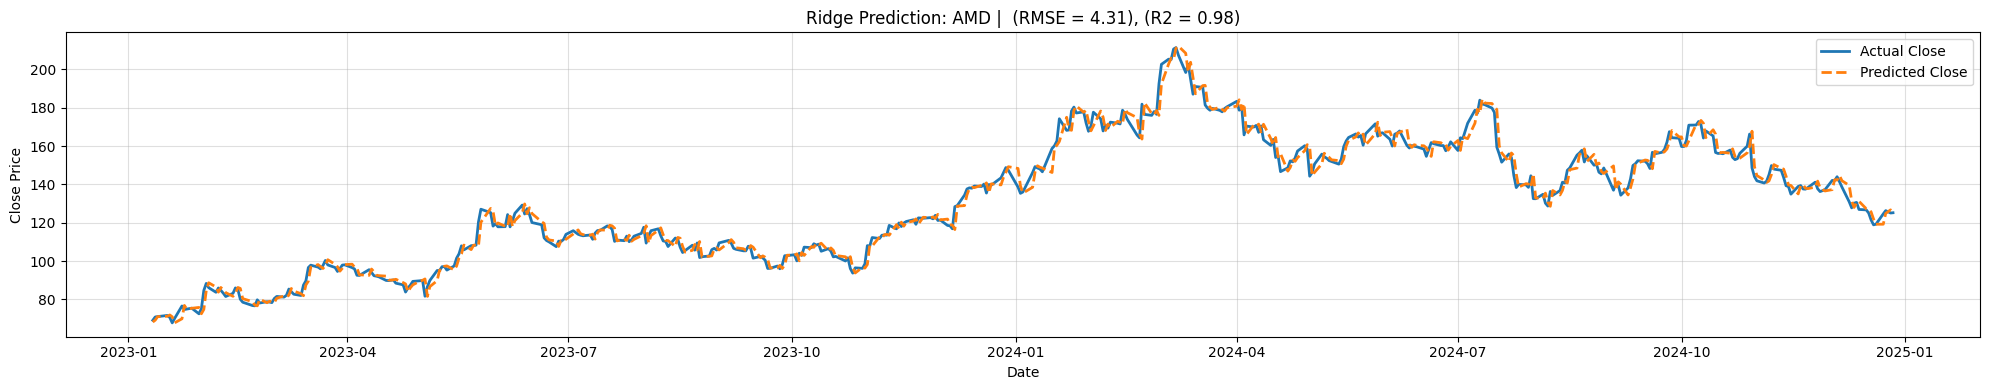


Ridge processing complete.
Processed stocks: ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'META', 'NVDA', 'JPM', 'V', 'UNH', 'HD', 'PG', 'DIS', 'MA', 'BAC', 'NFLX', 'ADBE', 'PYPL', 'CMCSA', 'XOM', 'PFE', 'KO', 'INTC', 'CSCO', 'NKE', 'MRK', 'PEP', 'ABBV', 'ABT', 'CRM', 'ORCL', 'T', 'VZ', 'CVX', 'MCD', 'WMT', 'DHR', 'ACN', 'LLY', 'AVGO', 'QCOM', 'TXN', 'NEE', 'COST', 'TMUS', 'IBM', 'SBUX', 'MDT', 'HON', 'AMD']
Skipped stocks: []


In [11]:
for symbol in stocks:
    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print(f"\n--- Processing {symbol} ---")
    # Find latest processed CSV for the symbol
    files = glob.glob(f"{processed_folder}/{symbol}_processed*.csv")
    if files:
        processed_file = sorted(files)[-1]  # pick the latest file
    else:
        print(f"Processed file for {symbol} not found. Skipping.")
        skipped_stocks.append(symbol)
        continue
    #######

    data = pd.read_csv(processed_file, index_col=0, parse_dates=True)
    data['Target_Close'] = data['Close'].shift(-1)
    data = data.dropna()

    data['Price_Change_Pct'] = data['Close'].pct_change()
    data['Target_Return'] = data['Price_Change_Pct'].shift(-1)
    data['MA_20'] = data['Close'].rolling(window=20).mean()
    data['Close_Dist_MA'] = (data['Close'] - data['MA_20']) / data['MA_20'] 

    data = data.dropna()

    features = ['Close_Dist_MA', 'Volatility', 'Price_Change_Pct']
    X = data[features]
    y = data['Target_Return']
    
    ####### Train Test

    split = int(len(data) * 0.8)
    X_train, X_test = X.iloc[:split], X.iloc[split:]
    y_train, y_test = y.iloc[:split], y.iloc[split:]

    ######## Scaler

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    ######## Ridge

    ridge = Ridge()
    ridge.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge.predict(X_test_scaled)

    ####### Recursion Forecast

    FUTURE_DAYS = 30
    NOISE_FACTOR = 0.2

    current_volatility = data['Volatility'].iloc[-1]
    current_price = data['Close'].iloc[-1]
    current_row = X.iloc[[-1]].copy()
    forecast_data = []

    for i in range(FUTURE_DAYS):
        scaled_row = scaler.transform(current_row)
        pred_return = ridge.predict(scaled_row)[0]
        
        noise = np.random.normal(0, current_volatility * NOISE_FACTOR)
        final_return = pred_return + noise
        
        current_price = current_price * (1 + final_return)
        forecast_data.append(current_price)

        last_ma = data['MA_20'].iloc[-1] 
        new_dist_ma = (current_price - last_ma) / last_ma   

        current_row = pd.DataFrame([[new_dist_ma, current_volatility, final_return]], columns=features)

    ####### Convert Return to CLose
    #1. predicted_close = test_close * (1+ predicted_return)  (use this for evaluation >> It shows how much my prediction deviated from the original value... or smth like that)
    #2. predicted_close = (1+ predicted_return) * predicted_close (independently deviates the price. Isolated values. Extrapolation stuff)

    y_test_close = data['Close'].iloc[split:]

    previous_close = data['Close'].shift(1).iloc[split:]
    y_pred_close = previous_close * (1 + y_pred_ridge)

    ####### Metrics

    mse_ridge = mean_squared_error(y_test_close, y_pred_close)
    rmse_ridge = np.sqrt(mse_ridge)
    r2_ridge = r2_score(y_test_close, y_pred_close)
    mape_ridge = np.mean(np.abs((y_test_close - y_pred_close) / np.where(y_test_close==0, 1e-8, y_test_close))) * 100

    #######    Plots

    plt.figure(figsize=(20, 4))
    plt.plot(y_test_close.index, y_test_close.values, label='Actual Close', linewidth=2)
    plt.plot(y_test_close.index, y_pred_close, label='Predicted Close', linewidth=2, linestyle='--')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.title(f'Ridge Prediction: {symbol} |  (RMSE = {rmse_ridge:.2f}), (R2 = {r2_ridge:.2f})')
    plot_file = os.path.join(plots_folder, f"{symbol}_ridge_plot.png")
    plt.savefig(plot_file)
    plt.legend()
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

    #######

    metrics_df = pd.DataFrame([{
            'Symbol': symbol,
            'MSE': mse_ridge,
            'RMSE': rmse_ridge,
            'MAPE': mape_ridge,
            'R2': r2_ridge
        }])
    metrics_df.to_csv(os.path.join(predictions_folder, f"{symbol}_metrics.csv"), index=False)

    predictions = pd.DataFrame({
        'Actual_Close': y_test_close,
        'Predicted_Close': y_pred_close
    })
    predictions_file = os.path.join(predictions_folder, f"{symbol}_predictions.csv")
    predictions.to_csv(predictions_file)

    # Save forecast CSV

    last_date = data.index[-1]
    future_dates = pd.bdate_range(start=last_date, periods=FUTURE_DAYS + 1)[1:]

    forecast_df = pd.DataFrame({
        "Date": future_dates,
        "Predicted_Close": forecast_data
    })
    forecast_csv_path = os.path.join(predictions_folder_recursive, f"{symbol}_recursive_forecast.csv")
    forecast_df.to_csv(forecast_csv_path, index=False)

    #######

    processed_stocks.append(symbol)

print("\nRidge processing complete.")
print("Processed stocks:", processed_stocks)
print("Skipped stocks:", skipped_stocks)